# Problem Statement

This is the data of Income evaluation for different countries.

Based on the available features, build a model to predict whether a person's income exceeds a certain threshold 

(E.x.,<=50K or >50K), Which will help to identify the factors that contribute to higher incomes.


In [ ]:
"""Our objective is to build a model that predicts whether a person's income is above or below 50000.
    We will also be able to identify the factors that are important for higher income """

# Description of our dataset

- Age: The age of an employee
- Work-class: Profession category 
- Final_census : Census(population of the country)
- Education: Type of last (max) Education
- Education_num: Years spend on studies
- Marital Status: Person married or not
- Occupation: Person 
- Relationship: Bounded by any relation or dependent 
- Race: which ethnicity belongs to the employee 
- Gender: gender of the employee
- Capital-gain: Capital gain refers to the profit earned when selling a capital asset, such as stocks, real estate, or valuable possessions. It represents the difference between the selling price of the asset and its original purchase price.
- Capital-loss: Capital loss refers to the financial loss incurred when selling a capital asset at a price lower than its original purchase price. It represents the negative difference between the selling price and the purchase price of the asset.
- Hours/week : How many working hours in a week
- Country : Country where it belongs

 
- Income threshold(Target Column) : two range of Income one is <=50k and >50K


In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedShuffleSplit, cross_validate
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_recall_curve, f1_score,roc_auc_score, roc_curve, precision_recall_fscore_support
from sklearn.inspection import PartialDependenceDisplay
from sklearn import tree

from treeinterpreter import treeinterpreter
from waterfall_chart import plot as waterfall

from imblearn.over_sampling import SMOTE,ADASYN,RandomOverSampler,BorderlineSMOTE,SVMSMOTE
from imblearn.under_sampling import RandomUnderSampler

In [2]:
pd.set_option('display.max_columns',200)
pd.set_option('display.max_rows',300)
pd.set_option('display.max_colwidth',200)

In [3]:
#We saw some ' ?' in the data. So, na_values =' ?' includes the ' ?' as NaN while reading the file.
df_org = pd.read_csv('Data_inc.csv',low_memory = False,na_values=' ?')

In [4]:
df_org.head(30)

,Age,Profession Class,Final_census,Education,Education-num,marital-status,occupation,relationship,race,Gender,capital-gain,capital-loss,hours-per-week,country,income,Unnamed: 15
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,NaN
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,NaN
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,NaN
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,NaN
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,NaN
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K,NaN
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K,NaN
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K,NaN
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K,NaN
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K,NaN


In [5]:
df_org.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               32561 non-null  int64  
 1   Profession Class  30725 non-null  object 
 2   Final_census      32561 non-null  int64  
 3    Education        32561 non-null  object 
 4    Education-num    32561 non-null  int64  
 5    marital-status   32561 non-null  object 
 6    occupation       30718 non-null  object 
 7    relationship     32561 non-null  object 
 8    race             32561 non-null  object 
 9   Gender            32561 non-null  object 
 10   capital-gain     32561 non-null  int64  
 11   capital-loss     32561 non-null  int64  
 12   hours-per-week   32561 non-null  int64  
 13   country          31978 non-null  object 
 14   income           32561 non-null  object 
 15  Unnamed: 15       2 non-null      float64
dtypes: float64(1), int64(6), object(9)
memor

In [6]:
df_org.describe(include='all')

,Age,Profession Class,Final_census,Education,Education-num,marital-status,occupation,relationship,race,Gender,capital-gain,capital-loss,hours-per-week,country,income,Unnamed: 15
count,32561.000000,30725,3.256100e+04,32561,32561.000000,32561,30718,32561,32561,32561,32561.000000,32561.000000,32561.000000,31978,32561,2.0
unique,NaN,8,NaN,16,NaN,7,14,6,5,2,NaN,NaN,NaN,41,2,NaN
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K,NaN
freq,NaN,22696,NaN,10501,NaN,14976,4140,13193,27816,21790,NaN,NaN,NaN,29170,24720,NaN
mean,38.581647,NaN,1.897784e+05,NaN,10.080679,NaN,NaN,NaN,NaN,NaN,1077.648844,87.303830,40.437456,NaN,NaN,55000.0
std,13.640433,NaN,1.055500e+05,NaN,2.572720,NaN,NaN,NaN,NaN,NaN,7385.292085,402.960219,12.347429,NaN,NaN,0.0
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN,55000.0
25%,28.000000,NaN,1.178270e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN,55000.0
50%,37.000000,NaN,1.783560e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN,55000.0
75%,48.000000,NaN,2.370510e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN,55000.0


In [7]:
#Let's treat the null values first.

In [8]:
#Before that, Lets check if anyother meaning less value like '?' is in the dataset.
for i in df_org.columns:
    print(i,df_org[i].unique())

Age [39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87]
Profession Class [' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 nan ' Self-emp-inc' ' Without-pay' ' Never-worked']
Final_census [ 77516  83311 215646 ...  34066  84661 257302]
 Education [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']
 Education-num [13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]
 marital-status [' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']
 occupation [' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fish

In [9]:
#There is nothing else, but an empty space is there before every string in the dataset. Let's just remove them.

In [10]:
#We just removed spaces from the Column Names.
df_org.columns = ['Age', 'Profession Class', 'Final_census', 'Education',
       'Education-num', 'Marital-status', 'Occupation', 'Relationship',
       'Race', 'Gender', 'Capital-gain', 'Capital-loss', 'Hours-per-week',
       'Country', 'Income', 'Unnamed:15']

In [11]:
cols_obj = [i for i in df_org.columns if df_org[i].dtype == 'object']

In [12]:
for i in cols_obj:
    df_org[i] = df_org[i].apply(lambda x: x if pd.isnull(x) else x.strip() )

In [13]:
#Let'see the percentage of null values
(df_org.isnull().sum()).sort_values(ascending=False)/len(df_org)

Unnamed:15          0.999939
Occupation          0.056601
Profession Class    0.056386
Country             0.017905
Age                 0.000000
Final_census        0.000000
Education           0.000000
Education-num       0.000000
Marital-status      0.000000
Relationship        0.000000
Race                0.000000
Gender              0.000000
Capital-gain        0.000000
Capital-loss        0.000000
Hours-per-week      0.000000
Income              0.000000
dtype: float64

In [14]:
# 'Unnamed:15' has 99% of null values. So we can just drop it.
df_org = df_org.drop('Unnamed:15',axis=1)

In [15]:
# Let's try to treat the null values in the other columns
for i in ['Occupation','Profession Class','Country']:
    print(i, df_org[i].value_counts(normalize=True), sep='\n\n')
    print('-'*75)

Occupation

Prof-specialty       0.134774
Craft-repair         0.133440
Exec-managerial      0.132365
Adm-clerical         0.122729
Sales                0.118823
Other-service        0.107266
Machine-op-inspct    0.065174
Transport-moving     0.051989
Handlers-cleaners    0.044599
Farming-fishing      0.032359
Tech-support         0.030210
Protective-serv      0.021128
Priv-house-serv      0.004851
Armed-Forces         0.000293
Name: Occupation, dtype: float64
---------------------------------------------------------------------------
Profession Class

Private             0.738682
Self-emp-not-inc    0.082701
Local-gov           0.068120
State-gov           0.042246
Self-emp-inc        0.036322
Federal-gov         0.031245
Without-pay         0.000456
Never-worked        0.000228
Name: Profession Class, dtype: float64
---------------------------------------------------------------------------
Country

United-States                 0.912190
Mexico                        0.020108
Philipp

In [16]:
#Profession Class and Country null values can be replaced with its mode.Since one category has higher percentage of the data

In [17]:
#To fill in the null values for occupation, you'll have to look into it carefully.
#Since, the occupation category are equally distributed, it is important to see what should be filled in

In [18]:
df_org[(df_org['Occupation'].isnull())]

,Age,Profession Class,Final_census,Education,Education-num,Marital-status,Occupation,Relationship,Race,Gender,Capital-gain,Capital-loss,Hours-per-week,Country,Income
27,54,NaN,180211,Some-college,10,Married-civ-spouse,NaN,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K
61,32,NaN,293936,7th-8th,4,Married-spouse-absent,NaN,Not-in-family,White,Male,0,0,40,NaN,<=50K
69,25,NaN,200681,Some-college,10,Never-married,NaN,Own-child,White,Male,0,0,40,United-States,<=50K
77,67,NaN,212759,10th,6,Married-civ-spouse,NaN,Husband,White,Male,0,0,2,United-States,<=50K
106,17,NaN,304873,10th,6,Never-married,NaN,Own-child,White,Female,34095,0,32,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32530,35,NaN,320084,Bachelors,13,Married-civ-spouse,NaN,Wife,White,Female,0,0,55,United-States,>50K
32531,30,NaN,33811,Bachelors,13,Never-married,NaN,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,<=50K
32539,71,NaN,287372,Doctorate,16,Married-civ-spouse,NaN,Husband,White,Male,0,0,10,United-States,>50K
32541,41,NaN,202822,HS-grad,9,Separated,NaN,Not-in-family,Black,Female,0,0,32,United-States,<=50K


In [19]:
#Checking for the percentage of null values in Profession Class where Occupation is null
df_org[(df_org['Occupation'].isnull())]['Profession Class'].isnull().sum()/len(df_org[(df_org['Occupation'].isnull())])


0.9962018448182312

In [20]:
#As you can see, datas where Occupation is null, 99% of that data also have professional class null.

In [21]:
#Getting the counts of education-num of datapoints where Occupation is null
df_org[(df_org['Occupation'].isnull())]['Education-num'].value_counts().sort_index()


1       5
2      12
3      30
4      73
5      51
6     102
7     119
8      40
9     533
10    516
11     61
12     47
13    173
14     48
15     18
16     15
Name: Education-num, dtype: int64

In [22]:
#Education-num (9,10,13) are more where occupation is null. 

In [23]:
#Getting the datas wher Occupation is not null
df_occ_not_null = df_org[(df_org['Occupation'].isnull()).apply(lambda x:False if x == True else True)]
df_occ_not_null.head(10)

,Age,Profession Class,Final_census,Education,Education-num,Marital-status,Occupation,Relationship,Race,Gender,Capital-gain,Capital-loss,Hours-per-week,Country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [24]:
#Getting a sense of people with which education-num tends more to be in which ocupation
#and we use that information to fill our null values based on its education-num
df_occ_not_null[['Education-num','Occupation']].groupby('Education-num').value_counts(normalize=True)

Education-num  Occupation       
1              Other-service        0.326087
               Machine-op-inspct    0.239130
               Farming-fishing      0.195652
               Craft-repair         0.086957
               Adm-clerical         0.043478
               Priv-house-serv      0.043478
               Handlers-cleaners    0.043478
               Prof-specialty       0.021739
2              Other-service        0.256410
               Craft-repair         0.147436
               Machine-op-inspct    0.147436
               Farming-fishing      0.115385
               Handlers-cleaners    0.102564
               Priv-house-serv      0.070513
               Sales                0.051282
               Transport-moving     0.051282
               Prof-specialty       0.025641
               Exec-managerial      0.025641
               Protective-serv      0.006410
3              Other-service        0.211221
               Machine-op-inspct    0.184818
               Craft-r

In [25]:
#Replacing the null values in Occupation

#Replacing null values where education num<=8 with 'Other-service' since datas with education-num<=8 tends to be 
#in Occupation 'Other-service'rather than other occupations.Similarly,we fill other null values based on the education-num 

df_org['Occupation'] = np.where((df_org['Occupation'].isnull()) & (df_org['Education-num']<=8),
                                'Other-service',df_org['Occupation'])

df_org['Occupation'] = np.where((df_org['Occupation'].isnull())&
                                ((df_org['Education-num'] == 9) | (df_org['Education-num'] == 11)),
                                'Craft-repair',df_org['Occupation'])

df_org['Occupation'] = np.where((df_org['Occupation'].isnull())&
                                ((df_org['Education-num'] == 10) | (df_org['Education-num'] == 12)),
                                'Adm-clerical',df_org['Occupation'])

df_org['Occupation'] = np.where((df_org['Occupation'].isnull()) & (df_org['Education-num']>12),
                                'Prof-specialty',df_org['Occupation'])


In [26]:
#Getting the datas wher Profession is not null
df_pc_not_null = df_org[(df_org['Profession Class'].isnull()).apply(lambda x:False if x == True else True)]
df_pc_not_null.head(10)

,Age,Profession Class,Final_census,Education,Education-num,Marital-status,Occupation,Relationship,Race,Gender,Capital-gain,Capital-loss,Hours-per-week,Country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [27]:
df_pc_not_null[['Occupation','Profession Class']].groupby('Occupation').value_counts(normalize=True)

Occupation         Profession Class
Adm-clerical       Private             0.751060
                   Federal-gov         0.084040
                   Local-gov           0.075027
                   State-gov           0.067073
                   Self-emp-not-inc    0.013256
                   Self-emp-inc        0.008218
                   Without-pay         0.000795
                   Never-worked        0.000530
Armed-Forces       Federal-gov         1.000000
Craft-repair       Private             0.779268
                   Self-emp-not-inc    0.129512
                   Local-gov           0.035610
                   Self-emp-inc        0.025854
                   Federal-gov         0.015610
                   State-gov           0.013659
                   Without-pay         0.000244
                   Never-worked        0.000244
Exec-managerial    Private             0.661830
                   Self-emp-inc        0.098377
                   Self-emp-not-inc    0.096409
    

In [28]:
#We'll try to replace the null values for professional class based on Occupation.
#And many of the Occupation are under Private except Protective-serv and Armed-Forces

In [29]:
#Getting the df where occupation is protective-serv or armed-forces to check the nul values for profession class
df_oc_af_ps = df_org[(df_org['Occupation']=='Protective-serv') | (df_org['Occupation']=='Armed-Forces')]
df_oc_af_ps.head(10)

,Age,Profession Class,Final_census,Education,Education-num,Marital-status,Occupation,Relationship,Race,Gender,Capital-gain,Capital-loss,Hours-per-week,Country,Income
30,23,Local-gov,190709,Assoc-acdm,12,Never-married,Protective-serv,Not-in-family,White,Male,0,0,52,United-States,<=50K
86,49,Local-gov,268234,HS-grad,9,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
94,34,Local-gov,226296,Bachelors,13,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
167,46,State-gov,102628,Masters,14,Widowed,Protective-serv,Unmarried,White,Male,0,0,40,United-States,<=50K
171,28,State-gov,175325,HS-grad,9,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,<=50K
242,24,State-gov,273905,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,50,United-States,<=50K
292,29,Local-gov,220419,Bachelors,13,Never-married,Protective-serv,Not-in-family,White,Male,0,0,56,United-States,<=50K
342,36,State-gov,119272,HS-grad,9,Married-civ-spouse,Protective-serv,Husband,White,Male,7298,0,40,United-States,>50K
344,22,State-gov,293364,Some-college,10,Never-married,Protective-serv,Own-child,Black,Female,0,0,40,United-States,<=50K
402,50,State-gov,288353,Bachelors,13,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K


In [30]:
df_oc_af_ps['Profession Class'].isnull().sum()

0

In [31]:
#Zero null values in profession class where Occupation is armed-force or protective-serv.
#So, we could just replace the null values in profession class by Private (also its Mode).
#Since in Country column, 'USA' is 91% of the column, we can replace the missing values by USA itself

In [32]:
#Replacing the null values in Profession Class and Country
df_org['Profession Class'] = df_org['Profession Class'].replace(np.nan , 'Private')
df_org['Country'] = df_org['Country'].replace(np.nan , 'United-States')

In [33]:
df_org.isnull().sum().sum()

0

In [34]:
#Let's check for duplicates and drop them:
df_org.duplicated().sum()

24

In [35]:
df_org.drop_duplicates(inplace=True)

In [36]:
df_org.head()

,Age,Profession Class,Final_census,Education,Education-num,Marital-status,Occupation,Relationship,Race,Gender,Capital-gain,Capital-loss,Hours-per-week,Country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [37]:
df_org.reset_index(drop=True,inplace=True)

In [38]:
#Saving our DataFrame so when we open next time, we could just import it.
#Feather format is one of the fastest format to read and write a dataframe
os.makedirs('DataFrame',exist_ok=True)
df_org.to_feather('DataFrame/df_income_eval')

In [39]:
num_var = [i for i in df_org.columns if df_org[i].dtype != 'object']
print(f'Numeric columns:\n{num_var}\n\nCategorical Columns:\n{cols_obj}')

Numeric columns:
['Age', 'Final_census', 'Education-num', 'Capital-gain', 'Capital-loss', 'Hours-per-week']

Categorical Columns:
['Profession Class', 'Education', 'Marital-status', 'Occupation', 'Relationship', 'Race', 'Gender', 'Country', 'Income']


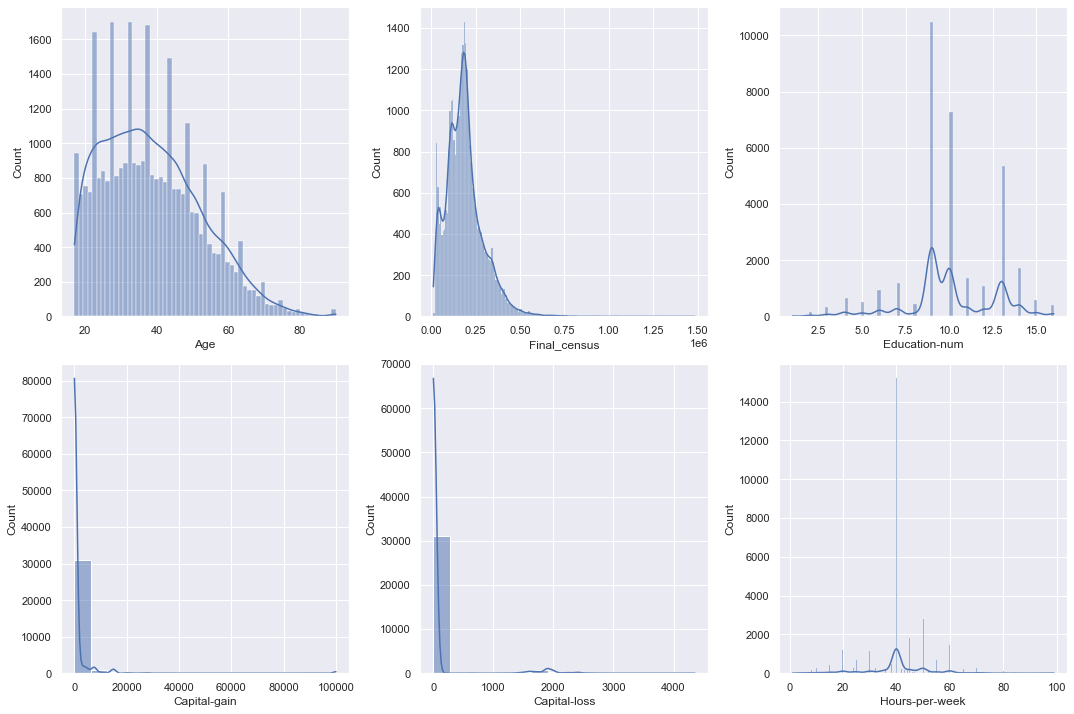

In [40]:
#Distribution of Numeric Columns
fig, axes = plt.subplots(2,3, figsize=(15,10))
c=0
for i in range(2):
    for j in range(3):
        sns.histplot(data = df_org, x = df_org[num_var[i+j+c]],kde=True,ax=axes[i,j])
    c+=j
plt.tight_layout(pad =1)


In [41]:
#Lets look into Final Census and Capital-gain and Capital_loss in detail

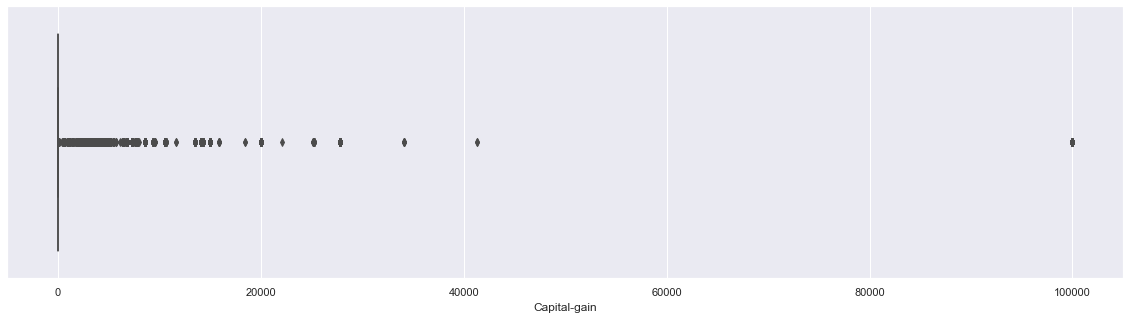

In [42]:
plt.figure(figsize=(20,5))
sns.boxplot(x = df_org['Capital-gain'])
plt.show()

In [43]:
#Looks like the values present are all outliers

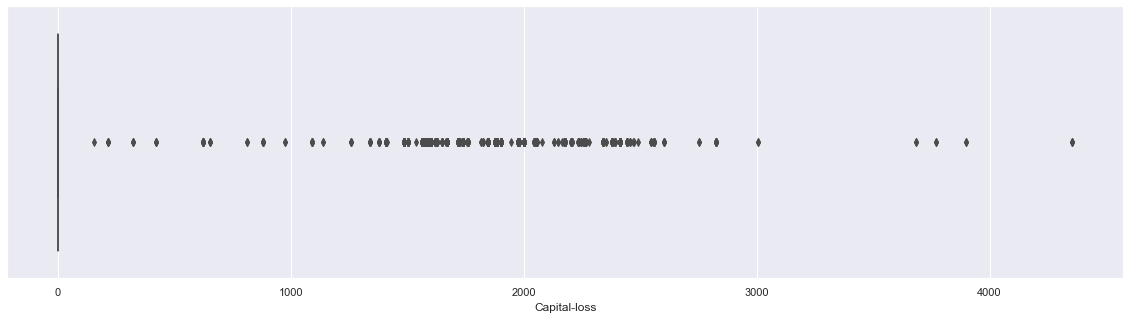

In [44]:
plt.figure(figsize=(20,5))
sns.boxplot(x = df_org['Capital-loss'])
plt.show()

In [45]:
#Likewise for Capital_loss.There are outliers in sense,there are only very few people with Capital-loss and gain.

In [40]:
#Lets see the percentage of 0 in these columns
for i in ['Capital-gain','Capital-loss']:
    print(i, df_org[i].value_counts(normalize=True), sep='\n')

Capital-gain
0        0.916649
15024    0.010665
7688     0.008729
7298     0.007561
99999    0.004887
5178     0.002981
3103     0.002981
4386     0.002151
5013     0.002121
8614     0.001690
3325     0.001629
2174     0.001475
10520    0.001322
4064     0.001291
14084    0.001260
4650     0.001260
3137     0.001137
20051    0.001137
27828    0.001045
594      0.001045
3908     0.000983
2829     0.000953
13550    0.000830
6849     0.000830
14344    0.000799
1055     0.000768
2885     0.000738
3411     0.000738
2176     0.000707
4787     0.000707
3464     0.000707
9386     0.000676
2597     0.000615
4101     0.000615
2407     0.000584
4865     0.000522
2202     0.000492
1506     0.000461
3942     0.000430
3674     0.000430
4416     0.000369
2580     0.000369
4508     0.000369
3781     0.000369
10605    0.000369
2463     0.000338
2907     0.000338
5455     0.000338
2354     0.000338
2635     0.000338
25236    0.000338
6497     0.000338
7430     0.000277
2105     0.000277
6418     0.0002

In [41]:
(df_org['Capital-gain']>40000).sum()

161

In [42]:
(df_org['Capital-gain']==99999).sum()

159

In [43]:
#You can see value 9999 in capital-gain. These are all definite human error or even null value. 
#There is 92% of 0 and 95% of 0 in Capital-gain and Capital-loss respectively.
#We won't just drop it as of now

In [44]:
#Treating the definite outliers.
df_org['Capital-gain'] = np.where(df_org['Capital-gain']>40000,df_org['Capital-gain'].median(),df_org['Capital-gain'])

In [51]:
#df_org = df_org.drop(['Capital-gain','Capital-loss'],axis=1)

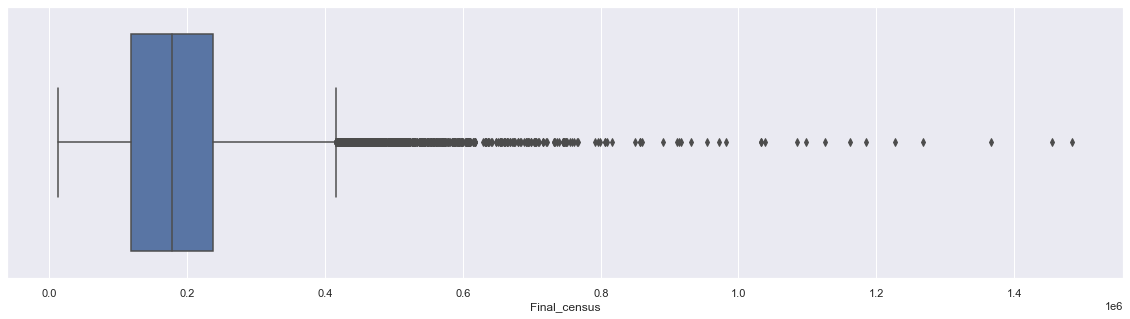

In [52]:
plt.figure(figsize=(20,5))
sns.boxplot(x = df_org['Final_census'])
plt.show()

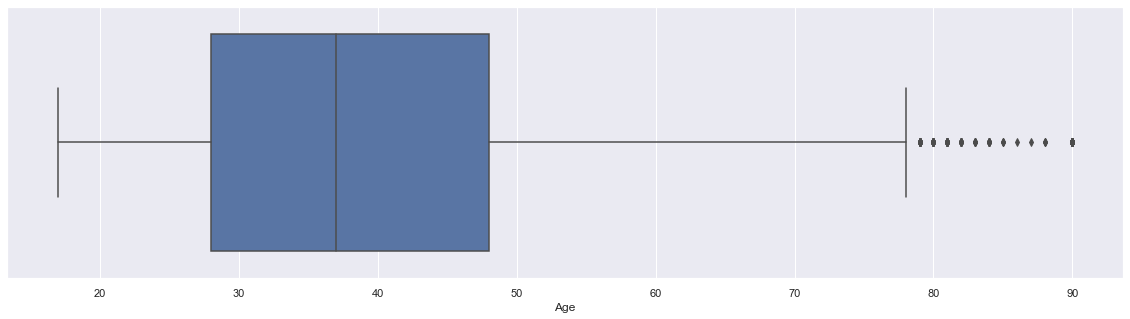

In [53]:
plt.figure(figsize=(20,5))
sns.boxplot(x = df_org['Age'])
plt.show()

In [45]:
(df_org['Age']>75).sum()

240

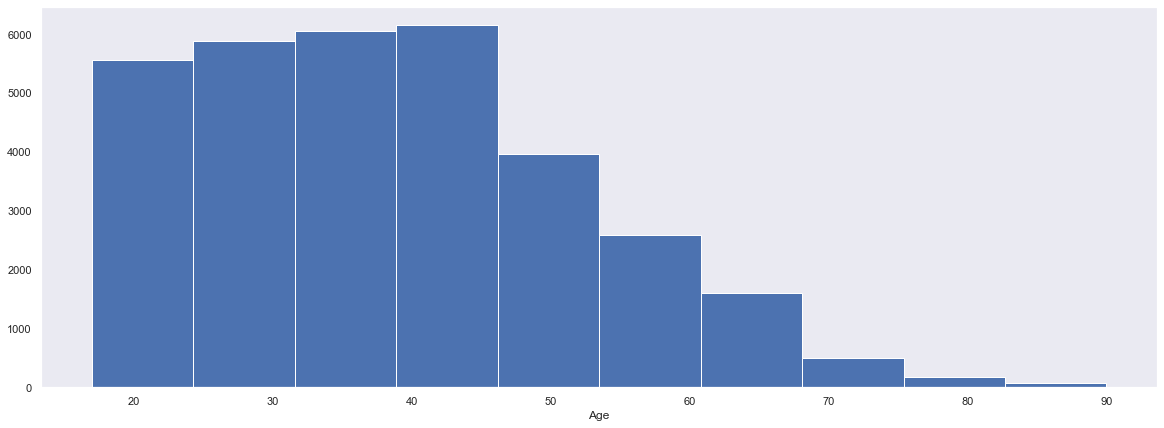

In [55]:
plt.figure(figsize=(20,7))
plt.grid(False)
plt.hist(df_org['Age'],bins=10)
plt.xlabel('Age')
plt.show()
#Majority of the people below 50

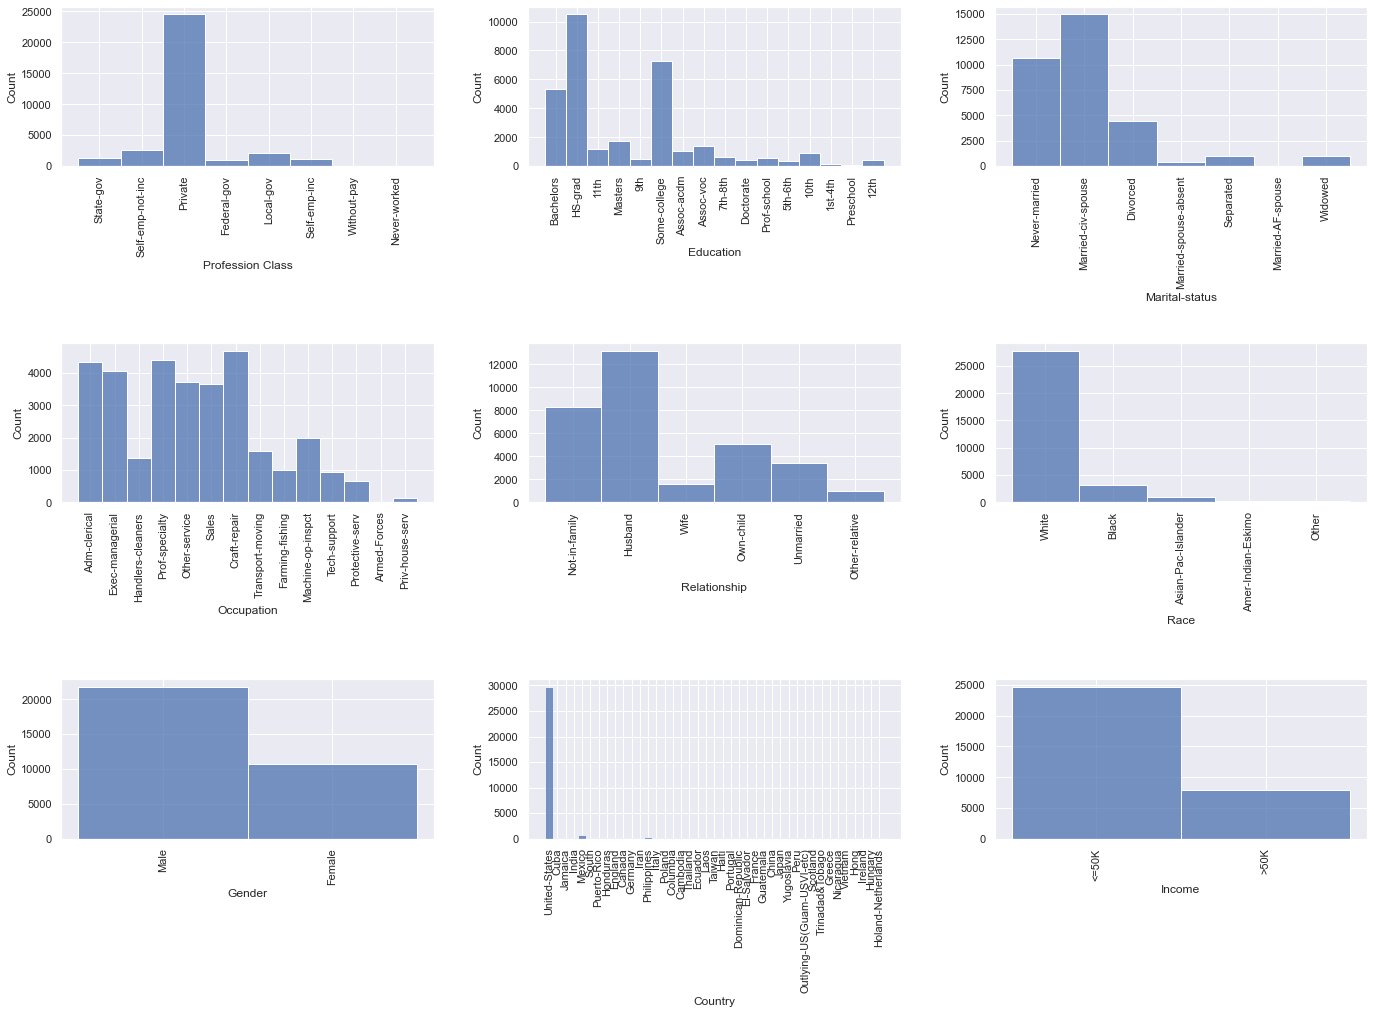

In [56]:
#Distribution of categorical variable 
fig, axes = plt.subplots(3,3, figsize=(20,15))
c=0

for i in range(3):
    for j in range(3):
        sns.histplot(data = df_org, x = df_org[cols_obj[i+j+c]],ax=axes[i,j],bins=30)
        axes[i,j].tick_params(axis='x',rotation = 90)
    c+=j
plt.tight_layout(pad =4)

In [46]:
def barplot_values_percent(ax,wid=0.25,hght=250):
    heightlst = []
    for i in ax.patches:
        heightlst.append(i.get_height())
    total = sum(heightlst)
    
    for i in ax.patches:
        x = i.get_x()+wid #adjust the numbers (higher numbers = to the right, lower = to the left)
        height = i.get_height()+hght #adjust the numbers (higher numbers = up, lower = down)
        value = ("{0:.2f}".format((i.get_height()/total)*100)+'%')
        
        ax.text(x, height, value, fontsize=12,color='black')

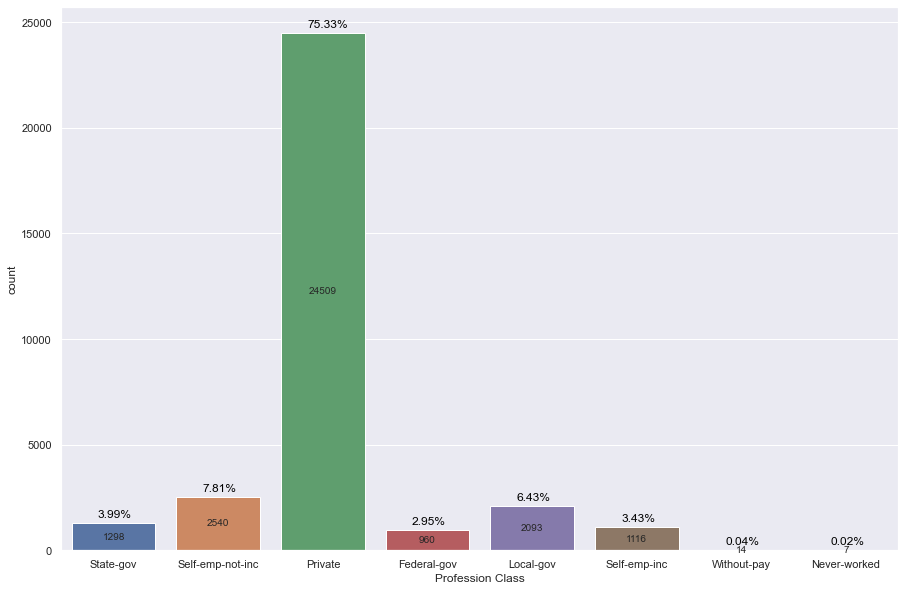

In [64]:
#Lets look at the domination percentage
plt.figure(figsize=(15,10))
ax = sns.countplot(x='Profession Class', data=df_org)
ax.bar_label(ax.containers[0],label_type='center')
barplot_values_percent(ax)
plt.show()

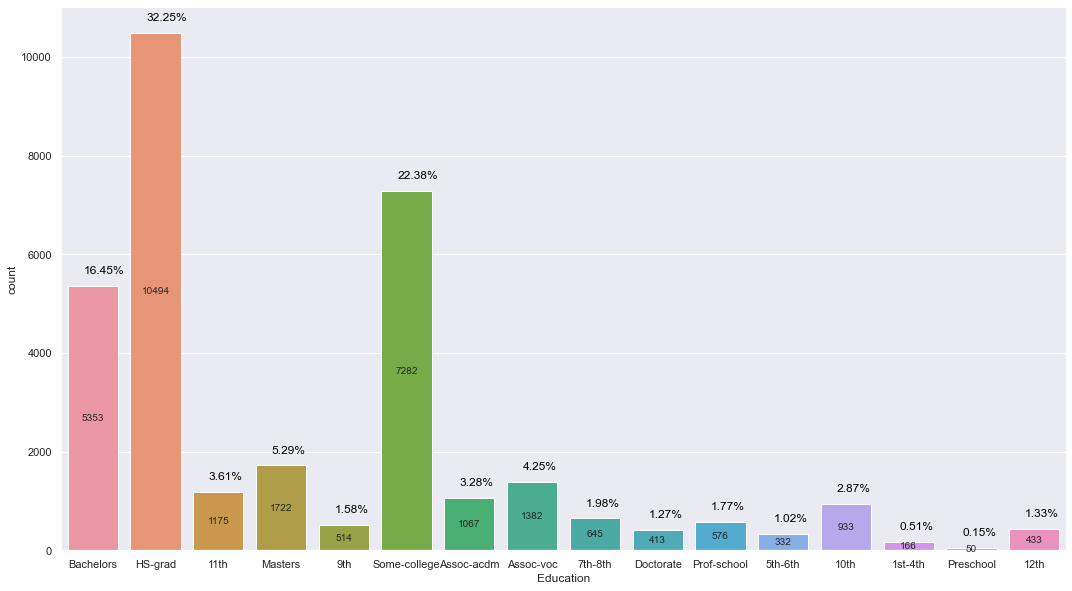

In [65]:
plt.figure(figsize=(18,10))
ax = sns.countplot(x='Education', data=df_org)
ax.bar_label(ax.containers[0],label_type='center')
barplot_values_percent(ax)
plt.show()

In [66]:
#Around 70% of the people has atleast one of the three education qualification(HS-grad,Some-college,Bachelors)

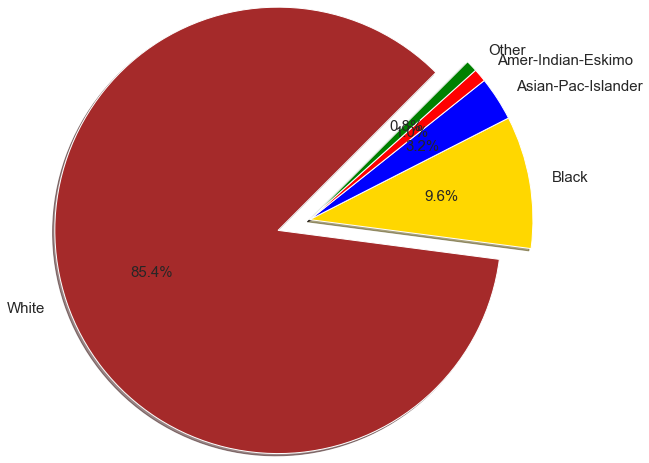

In [67]:
plt.figure(figsize = (5,15))
x = df_org['Race'].value_counts(normalize=True).values #85% of people in the data are white race
plt.pie(x,labels = df_org['Race'].unique(),radius=2,colors = ['brown','gold','blue','red','green'],
        startangle=45,explode=[0.3,0,0,0,0],shadow = True,autopct = '%0.1f%%',textprops={'fontsize':15})
plt.show()

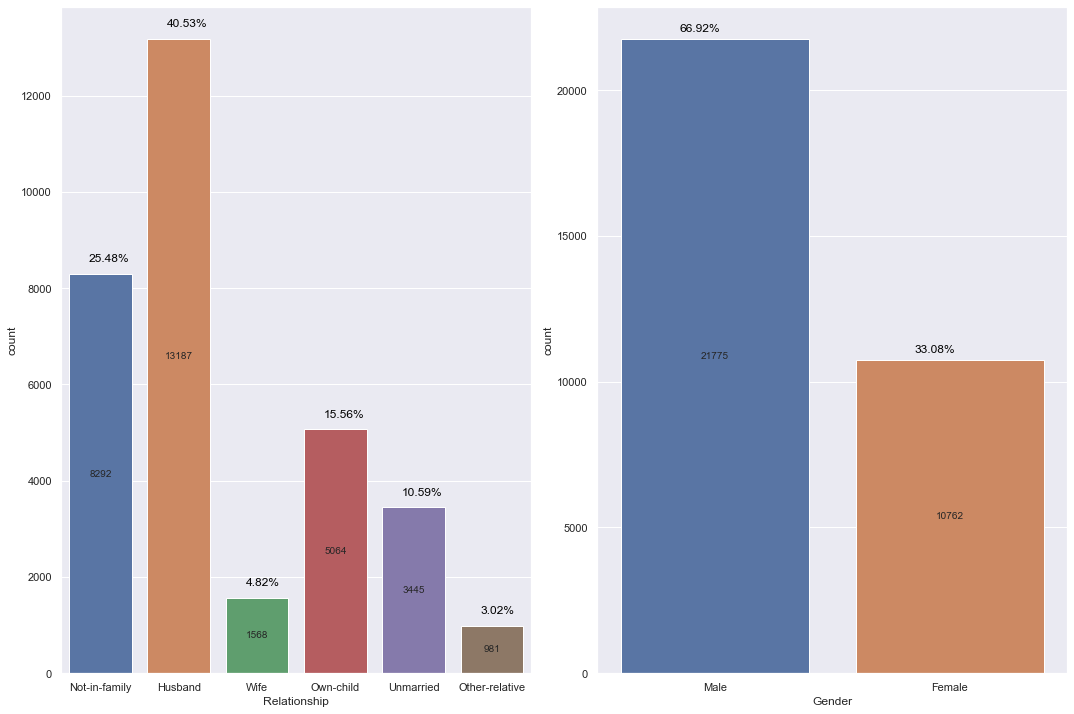

In [68]:
fig, axes = plt.subplots(1,2, figsize=(15,10))
col = ['Relationship','Gender']
for i in range(1):
    for j in range(2):
        sns.countplot(data = df_org, x = df_org[col[j]],ax=axes[j])
        axes[j].bar_label(axes[j].containers[0],label_type='center')
        barplot_values_percent(axes[j])
plt.tight_layout(pad =1)

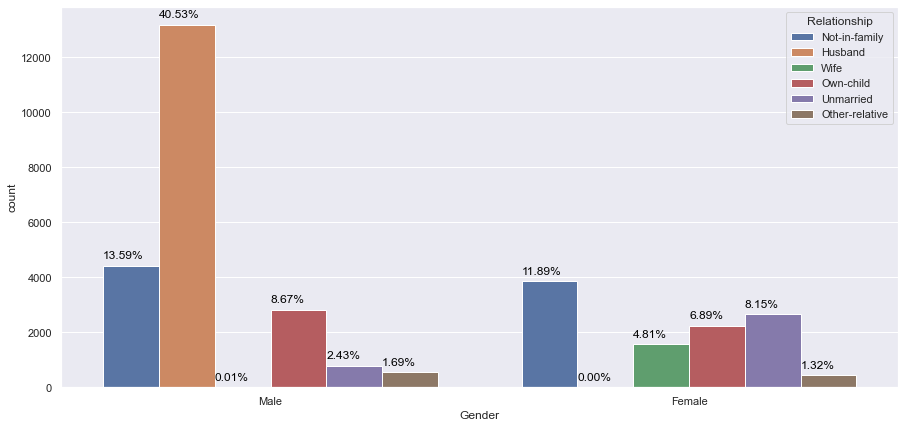

In [70]:
plt.figure(figsize=(15,7))
ax = sns.countplot(data=df_org,x='Gender',hue='Relationship')
barplot_values_percent(ax,wid=0)

In [71]:
#67% Male and 40% of them are Husbands and 13% of males are not in family. 
#33% Female and 20% of them are either not-in-family or unmarried

In [47]:
df_org['Country'].value_counts(normalize=True)

United-States                 0.913883
Mexico                        0.019639
Philippines                   0.006085
Germany                       0.004211
Canada                        0.003719
Puerto-Rico                   0.003504
El-Salvador                   0.003258
India                         0.003073
Cuba                          0.002920
England                       0.002766
Jamaica                       0.002489
South                         0.002459
China                         0.002305
Italy                         0.002244
Dominican-Republic            0.002151
Vietnam                       0.002059
Japan                         0.001906
Guatemala                     0.001906
Poland                        0.001844
Columbia                      0.001813
Taiwan                        0.001567
Haiti                         0.001352
Iran                          0.001322
Portugal                      0.001137
Nicaragua                     0.001045
Peru                     

In [73]:
#91% of the data is from United States and then followed by Mexico(1.9%) and Philippines(0.6%).

# Insights

- Private professional class simply dominates other profession classes.
- Top 3 Education levels: HS-Grad,Some college,Bachelors(Around 70% of the people have atleast 1 of these education)
- We have lot of husbands and Not-in-family category in Relationship variable proving us more males than females.
- 20% of the females are not-in-family or unmarried
- White race people and USA have dominated other categories in Race and Country variable respectively.
- We may also have a class imbalance in our target variable

In [259]:
#Saving our dataframe
df_org.to_feather('DataFrame/df_income_eval')

In [2]:
df_org = pd.read_feather('DataFrame/df_income_eval')


In [4]:
df_eda = df_org.copy()

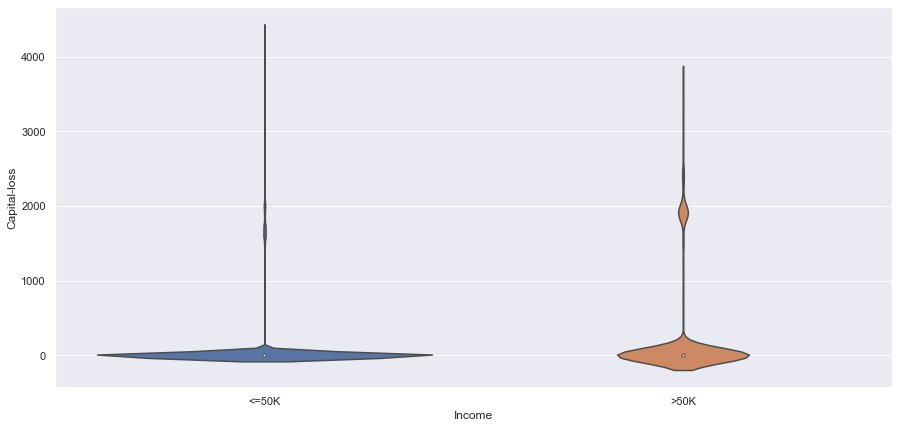

In [81]:
plt.figure(figsize=(15,7))
ax = sns.violinplot(data=df_eda,y='Capital-loss',x='Income')

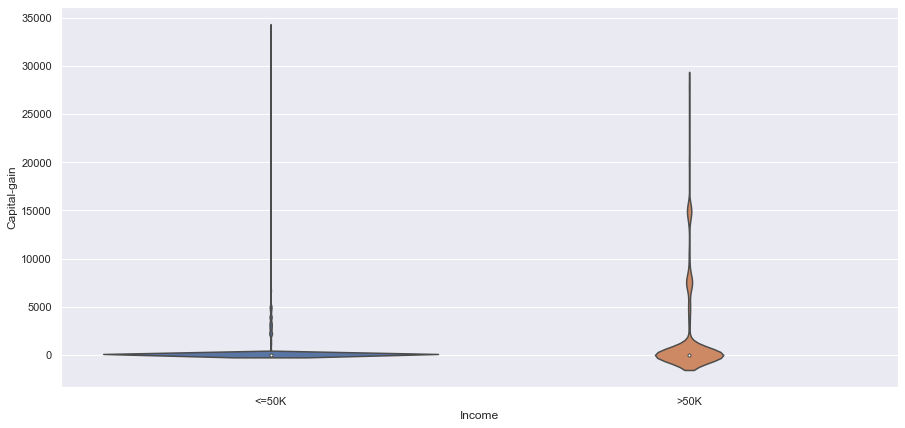

In [91]:
plt.figure(figsize=(15,7))
ax = sns.violinplot(data=df_eda,y='Capital-gain',x='Income')

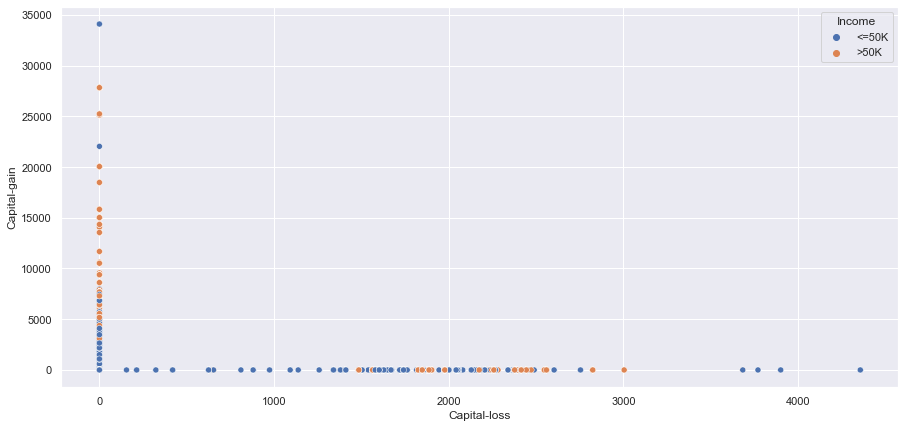

In [89]:
plt.figure(figsize=(15,7))
ax= sns.scatterplot(data=df_eda,x='Capital-loss',y='Capital-gain',hue='Income')

In [92]:
#Only small % of people have Capital-loss and Capital-gain and these columns might have some information 
#that tells us something about >50K class. We'll see whether its improves our model during Feature Selection

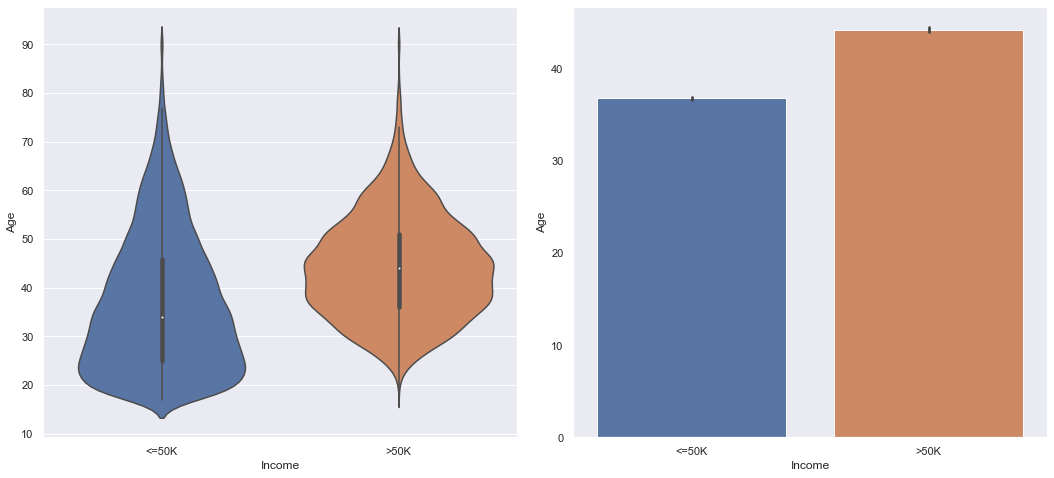

In [93]:
fig, axes = plt.subplots(1,2, figsize=(15,7))
sns.violinplot(data=df_eda,y='Age',x='Income',ax=axes[0])
sns.barplot(data=df_eda,y='Age',x='Income',ax=axes[1])
plt.grid(False)
plt.tight_layout(pad =2)

In [94]:
#Till age 50, there is somewhat a clear pattern, 17-30 tends to have Income <-50K and 30-50 age people tend have income >50K
#The average age of people in class <50K is around 35. The average age of people in class >50K is around 45.

<AxesSubplot:xlabel='Income', ylabel='Education-num'>

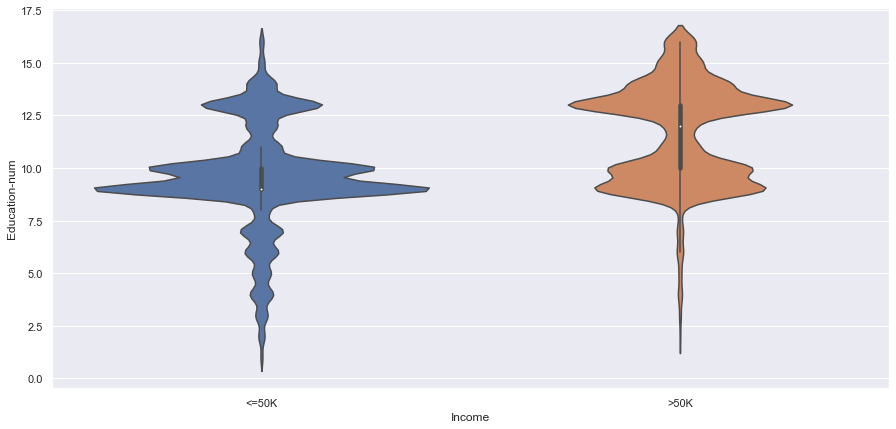

In [95]:
plt.figure(figsize=(15,7))
sns.violinplot(y= 'Education-num',x='Income',data=df_eda)

In [96]:
#People who has less than 7.5 years of education have higher probability to have <50K income.
#whereas people with greater than 12.5years of education tends to have income >50K

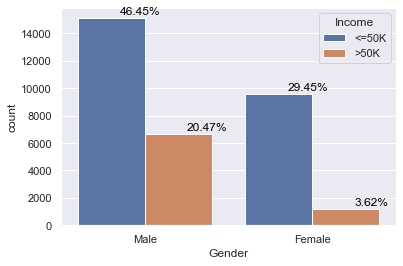

In [97]:
ax = sns.countplot(data=df_eda,x='Gender',hue='Income')
barplot_values_percent(ax)

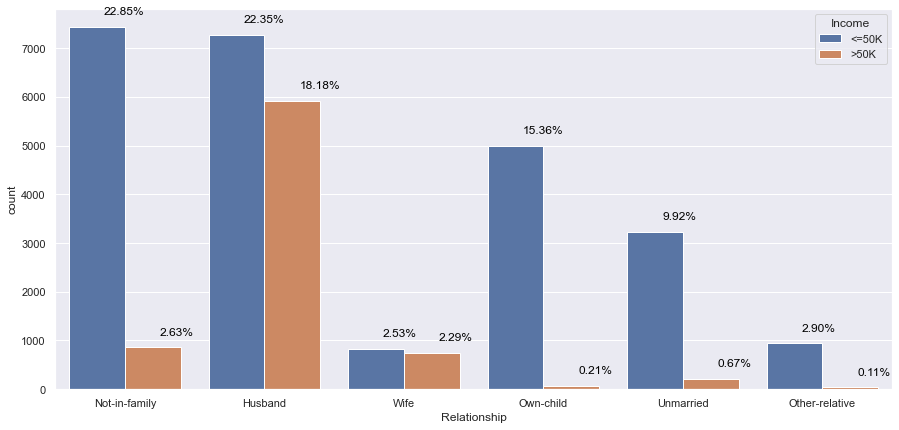

In [98]:
plt.figure(figsize=(15,7))
ax = sns.countplot(data=df_eda,x='Relationship',hue='Income',)
barplot_values_percent(ax)

In [258]:
#20% of male has income >50K and 18% of them are husbands and the remaining 2% would be from Not-in-family. 
#3% of female has income >50K and 2% of them are wives and the remaining would be unmarried or not-in-family


In [100]:
# Puttingthe Education-num as 0 for all the Education types which has <=12 education-num for visualization purpose
df_eda['Education-num-cat'] = np.where(df_eda['Education-num']<=12,0,df_eda['Education-num'])

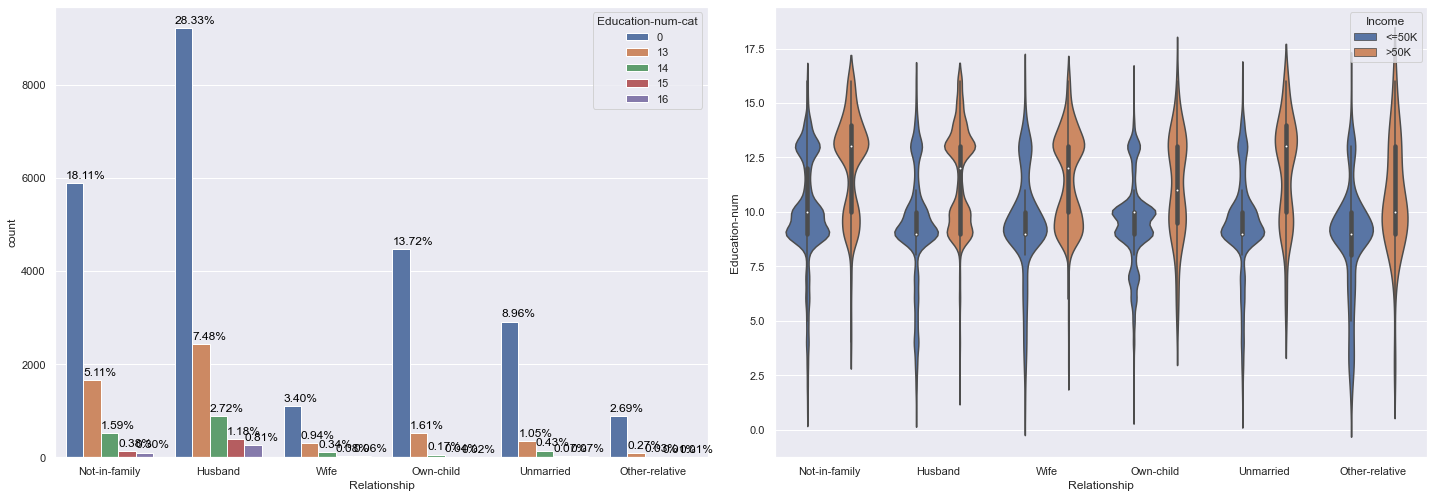

In [101]:
fig, axes = plt.subplots(1,2, figsize=(20,7))
sns.countplot(data=df_eda,hue='Education-num-cat',x='Relationship',ax=axes[0])
barplot_values_percent(axes[0],0,100)
sns.violinplot(data=df_eda,y='Education-num',x='Relationship',hue='Income',ax=axes[1])
plt.tight_layout(pad =1)
# 0 class(in the legend) in the left graph represents education-num<=12

In [103]:
#66% Male and 40% them are husbands and some 13% of them have education-num greater than 12.

#We picked threshold as 12 because from the violin plot of Income vs Education-num above 
#which shows people with >12 yars of education tends to be in >50K class.

#And from the violin plot on the right, majority of this 13% husbands (with >12yrs edu) tends to be in >50K income class.

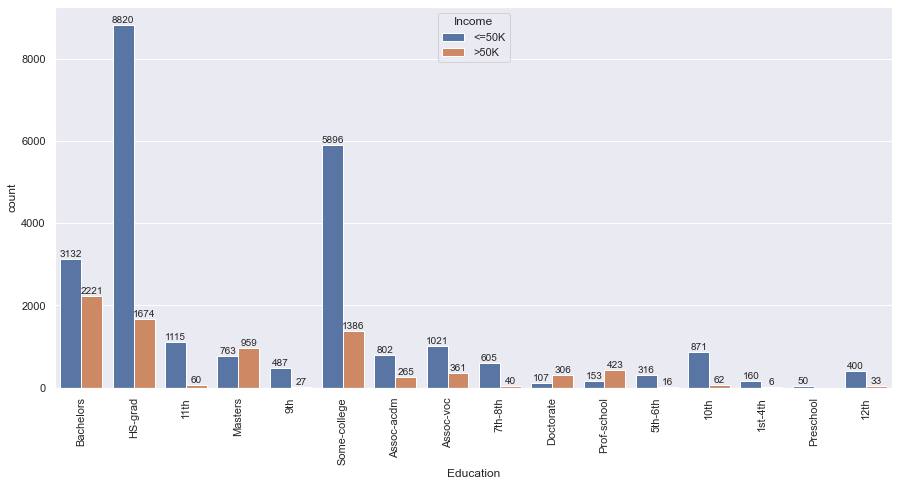

In [104]:
plt.figure(figsize=(15,7))
ax = sns.countplot(data=df_eda,x='Education',hue='Income')
for i in range(2): ax.bar_label(ax.containers[i])
plt.xticks(rotation=90)
plt.show()

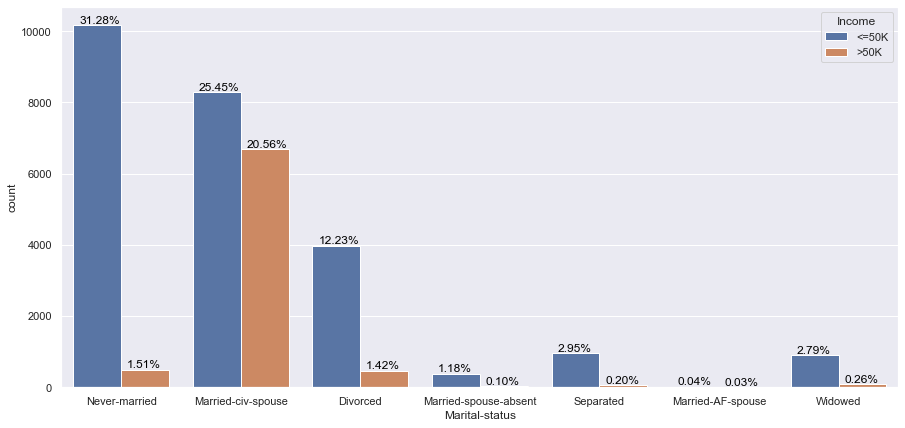

In [105]:
plt.figure(figsize=(15,7))
ax = sns.countplot(data=df_eda,x='Marital-status',hue='Income')
barplot_values_percent(ax,0.05,50)
plt.show()

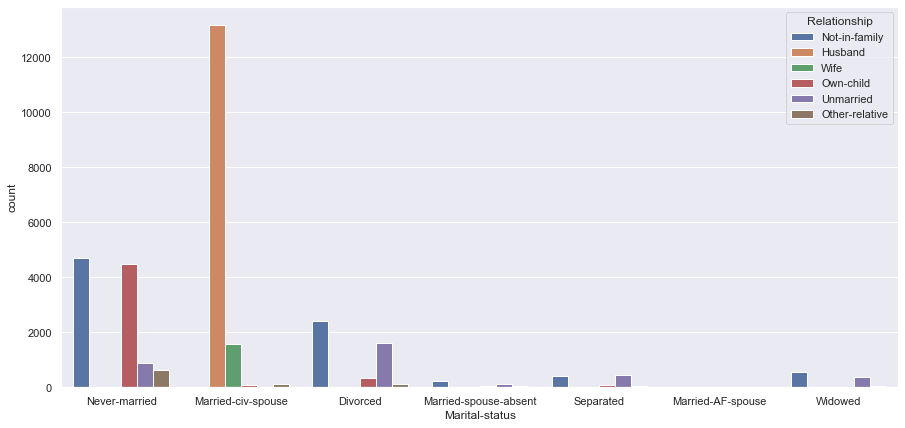

In [263]:
plt.figure(figsize=(15,7))
ax = sns.countplot(data=df_eda,x='Marital-status',hue='Relationship')
#barplot_values_percent(ax,0.05,50)
plt.show()

In [107]:
#Married-civ-spouse is the major contribution to the >50K class which also proves our insights above.
#Husbands and wives are major contributers and tends to be in the >50K class

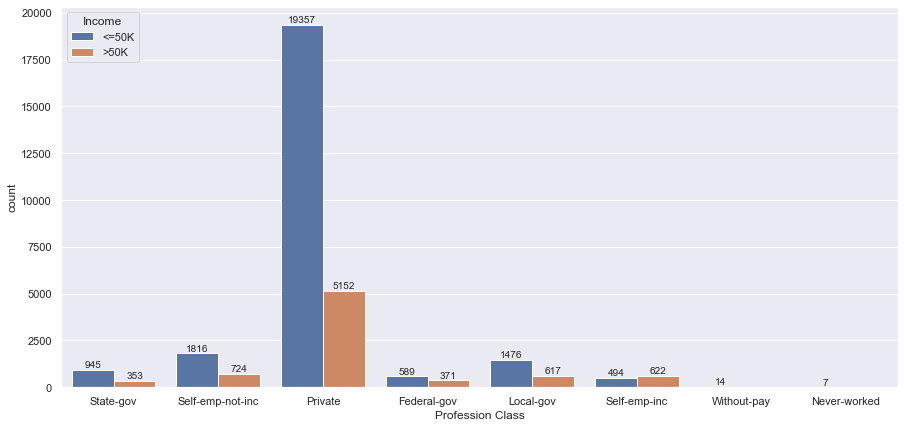

In [108]:
plt.figure(figsize=(15,7))
ax = sns.countplot(data=df_eda,x='Profession Class',hue='Income')
for i in range(2): ax.bar_label(ax.containers[i])
plt.show()

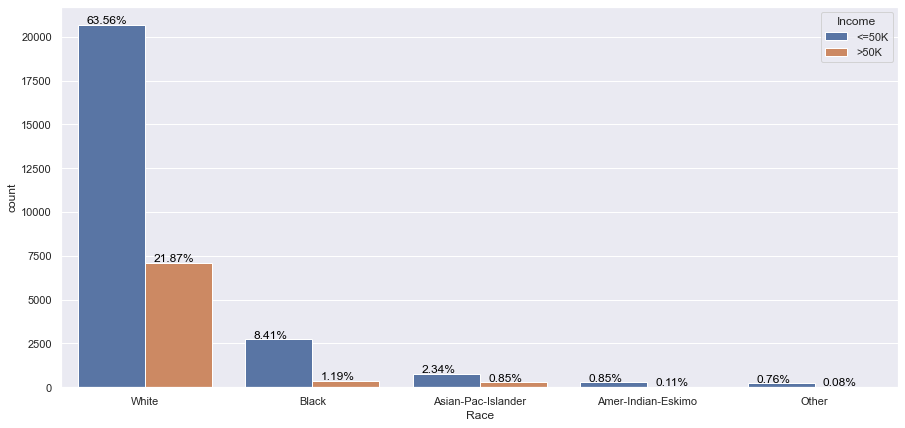

In [109]:
plt.figure(figsize=(15,7))
ax = sns.countplot(data=df_eda,x='Race',hue='Income')
barplot_values_percent(ax,0.05,50)
plt.show()

In [110]:
#We couldn't interpret much with the race column because majority of the people are white.
#Only less non-white people belong to >50K class

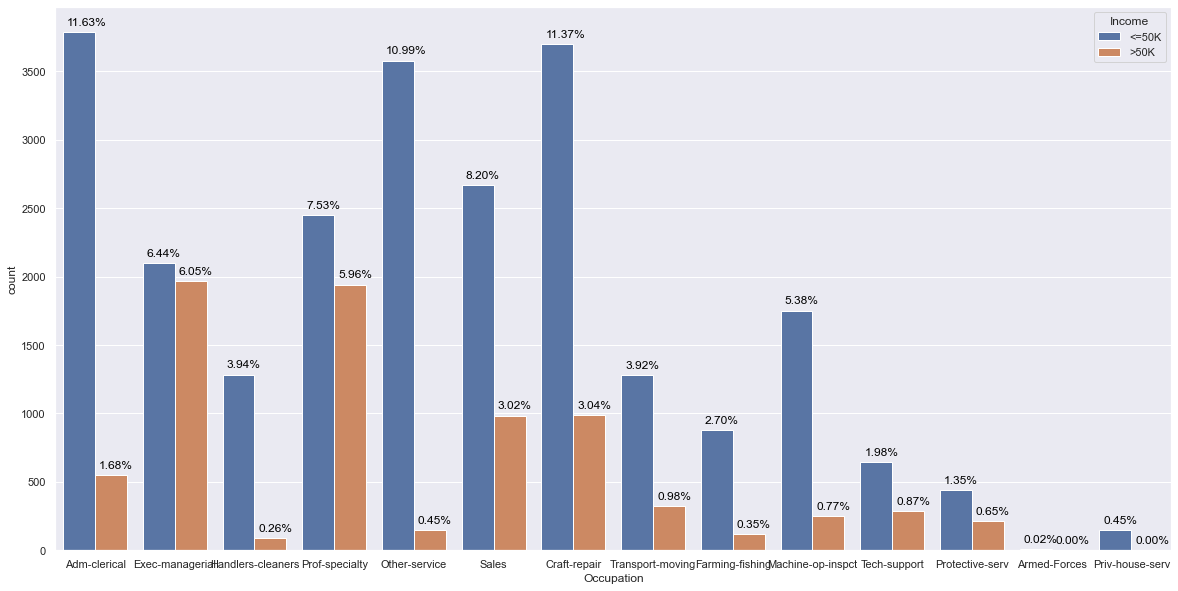

In [111]:
plt.figure(figsize=(20,10))
ax = sns.countplot(data=df_eda,x='Occupation',hue='Income')
barplot_values_percent(ax,0.05,50)


In [112]:
#Exec-manager, Prof-speciality,Tech-support & Protective-Serv have higher chance to be in class >50K when compared to other

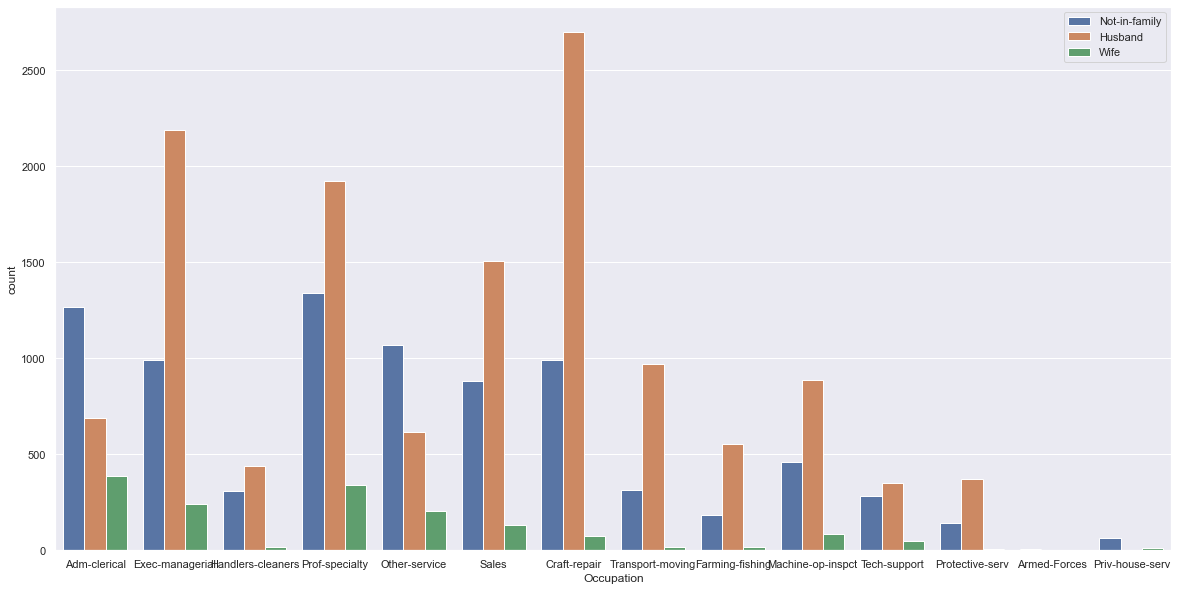

In [113]:
plt.figure(figsize=(20,10))
ax = sns.countplot(data=df_eda,x='Occupation',hue='Relationship',hue_order=['Not-in-family','Husband','Wife'])
ax.legend(loc = 'upper right')
plt.show()

In [114]:
#Husband's second highest common job 'Exec-manager'.
#'Prof-speciality' is one of the top most common job for wives and Not in family category.
#Note: Husband,wives and not in family are the major contributors for the class >50K

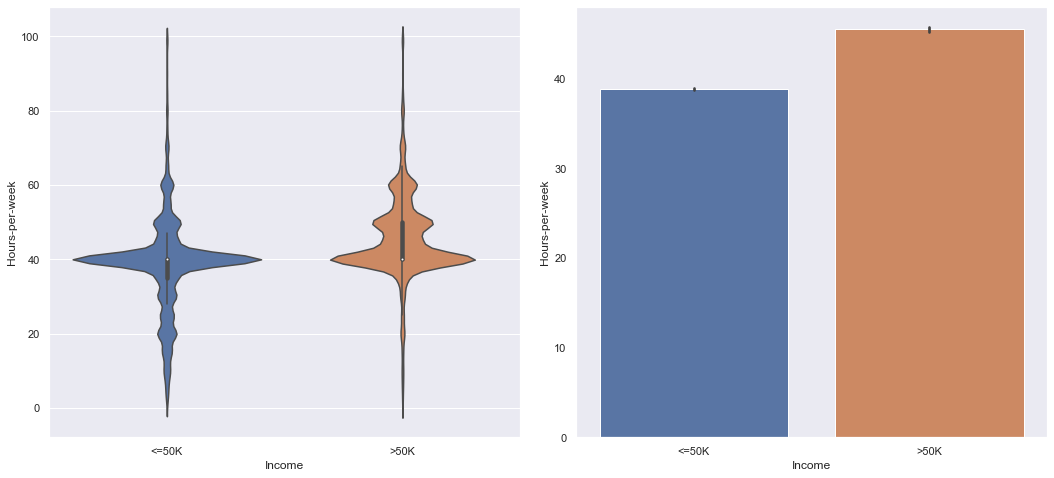

In [115]:
fig, axes = plt.subplots(1,2, figsize=(15,7))
sns.violinplot(data=df_eda,y='Hours-per-week',x='Income',ax=axes[0])
sns.barplot(data=df_eda,y='Hours-per-week',x='Income',ax=axes[1])
plt.grid(False)
plt.tight_layout(pad =2)

In [116]:
#You can see those who work above 45 hours a week tends to be in >50K class. Average hours of work differs for each class

<Figure size 216000x720 with 0 Axes>

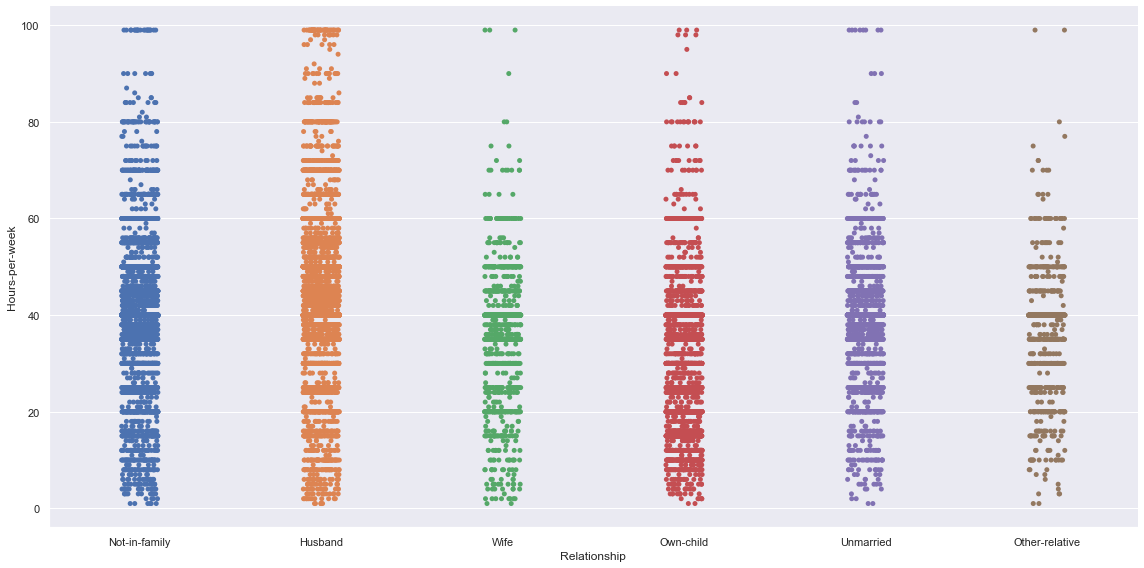

In [117]:
plt.figure(figsize=(3000,10))
sns.catplot(data=df_eda,y='Hours-per-week',x='Relationship',height=8,aspect=2)
plt.show()

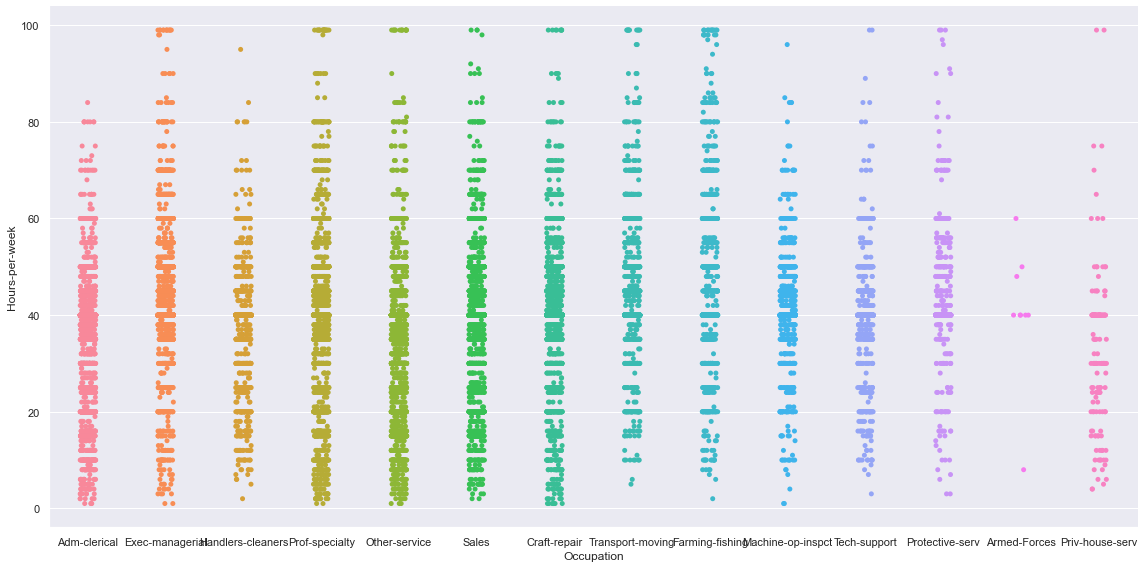

In [118]:
sns.catplot(data=df_eda,y='Hours-per-week',x='Occupation',height=8,aspect=2)
plt.show()

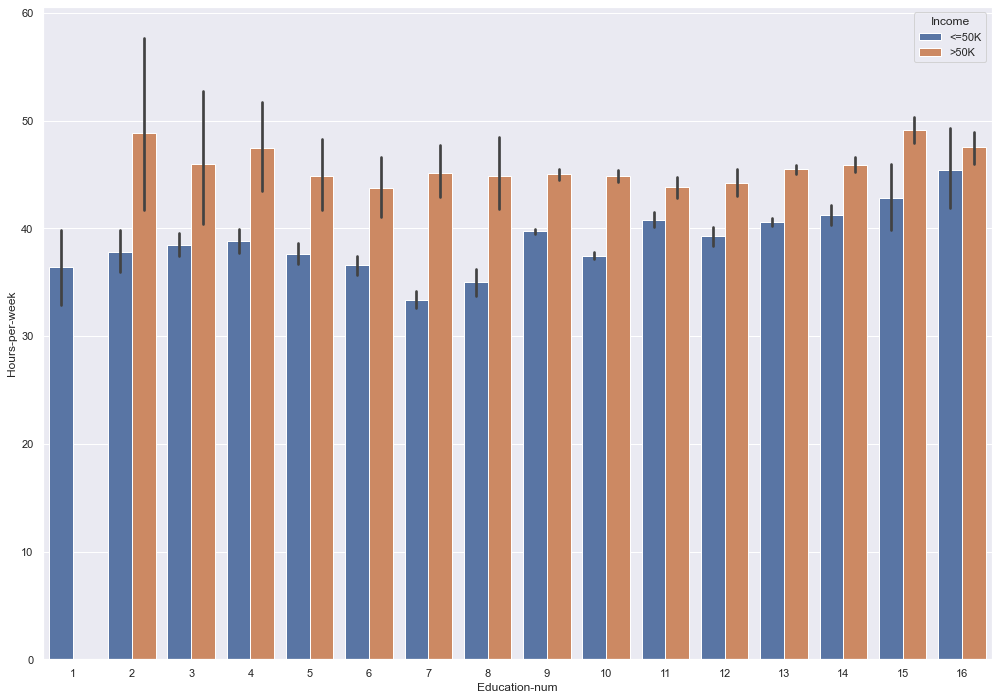

In [120]:
plt.figure(figsize=(17,12))
sns.barplot(data=df_eda,y='Hours-per-week',x='Education-num',hue='Income')
plt.show()

In [121]:
#The average working hours for education-num. Income >50K class tends to have slightly higher average working hours.
#Notice how the confidence interval decreases for Income >50K class as the num-education increases and vice versa for the <50K class

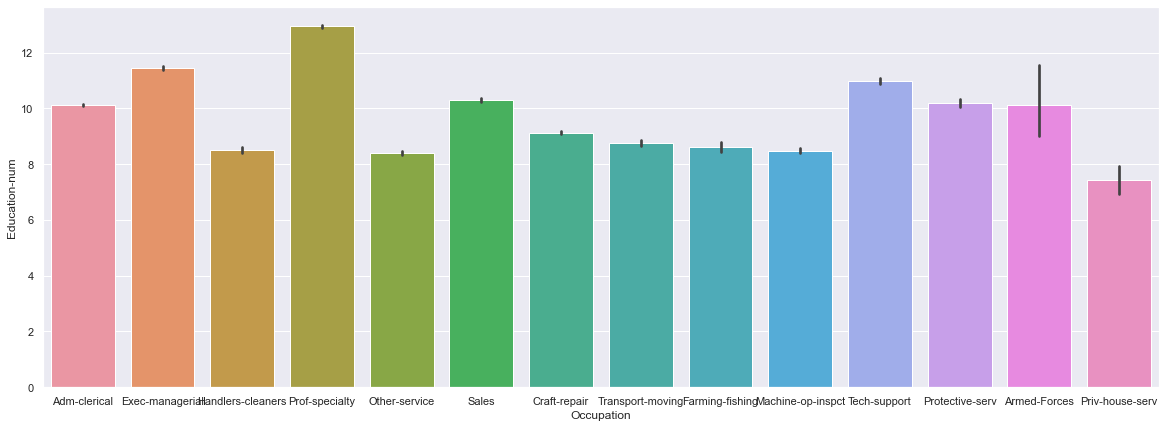

In [122]:
plt.figure(figsize=(20,7))
ax = sns.barplot(data=df_eda,x='Occupation',y='Education-num')


In [123]:
#Prof-seciality,Exec-manager and Tech Support category are the top 2 groups with high average no. of years spent on studies
#that leads us to the >50K class.

In [125]:
#Occupation wise, some of the occupation have similar working hours distributions 
#to the ones that tends to be in the >50K class.
#Perhaps the education-num and the occupation has more impact in classifying 50K and >50K
#45-65 hours of weeks could be one of the factors in classifying the data but maybe not that important.

In [127]:
df_eda_ed_sort = df_eda.sort_values('Education-num')

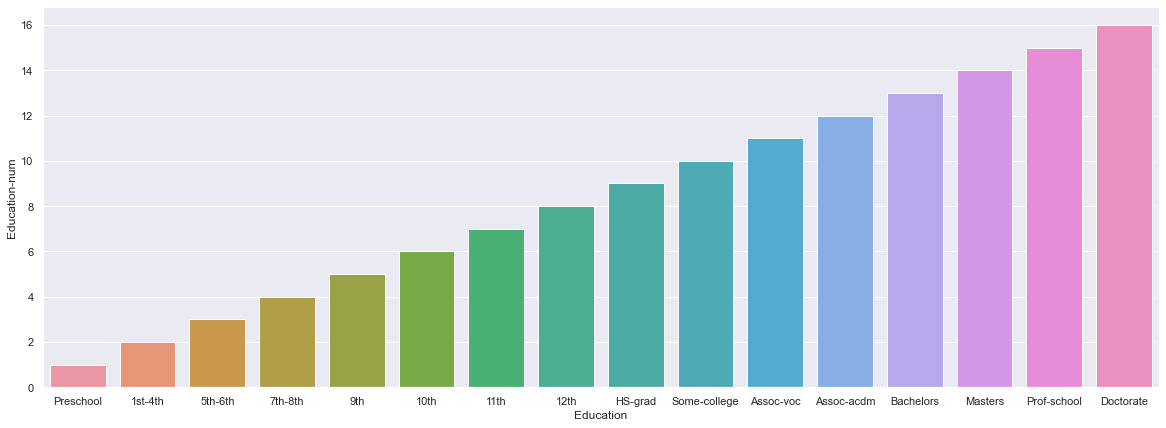

In [128]:
plt.figure(figsize=(20,7))
ax = sns.barplot(x='Education',y='Education-num',data=df_eda_ed_sort)

In [129]:
#From the above plot, We can know that Education has a relation with Education-num. Education num is completely 
#dependent on the Education or vice versa. It'll create correlation problem. So we would look to drop any one of it.
#Can be dealt in Feature Selection process.

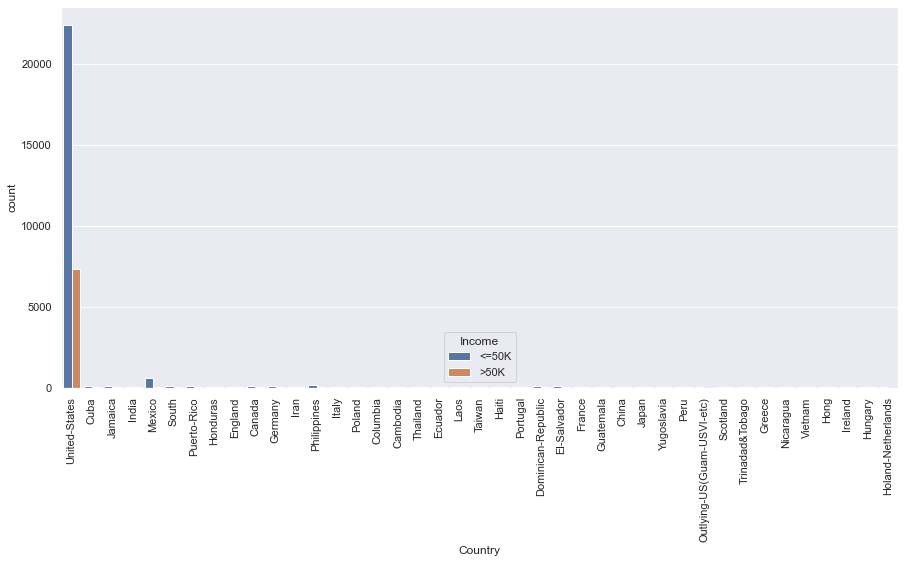

In [135]:
plt.figure(figsize=(15,7))
ax = sns.countplot(data=df_eda,x='Country',hue='Income')
plt.xticks(rotation=90)

plt.show()

<AxesSubplot:xlabel='Income', ylabel='Final_census'>

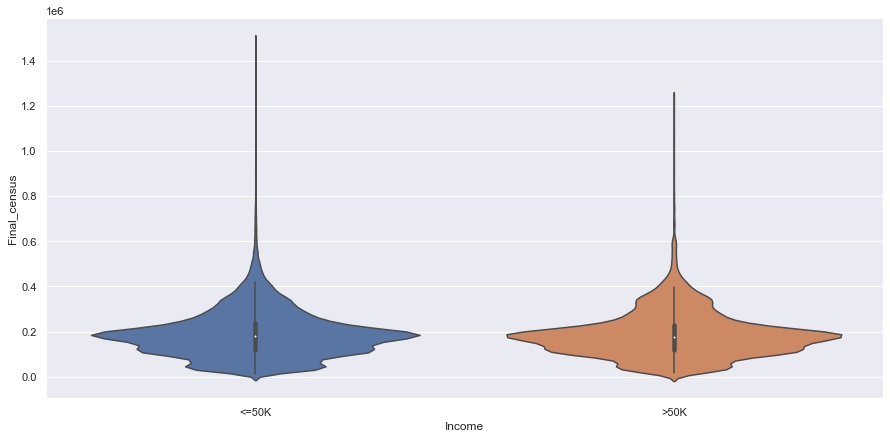

In [133]:
plt.figure(figsize=(15,7))
sns.violinplot(y='Final_census',x='Income',data=df_eda)

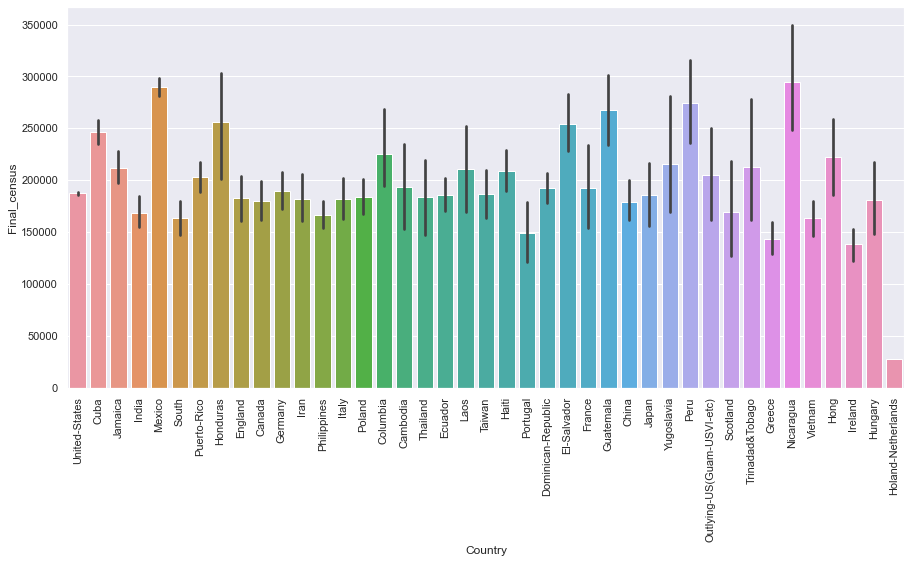

In [136]:
plt.figure(figsize=(15,7))
ax = sns.barplot(data=df_eda,x='Country',y='Final_census')
plt.xticks(rotation=90)

plt.show()

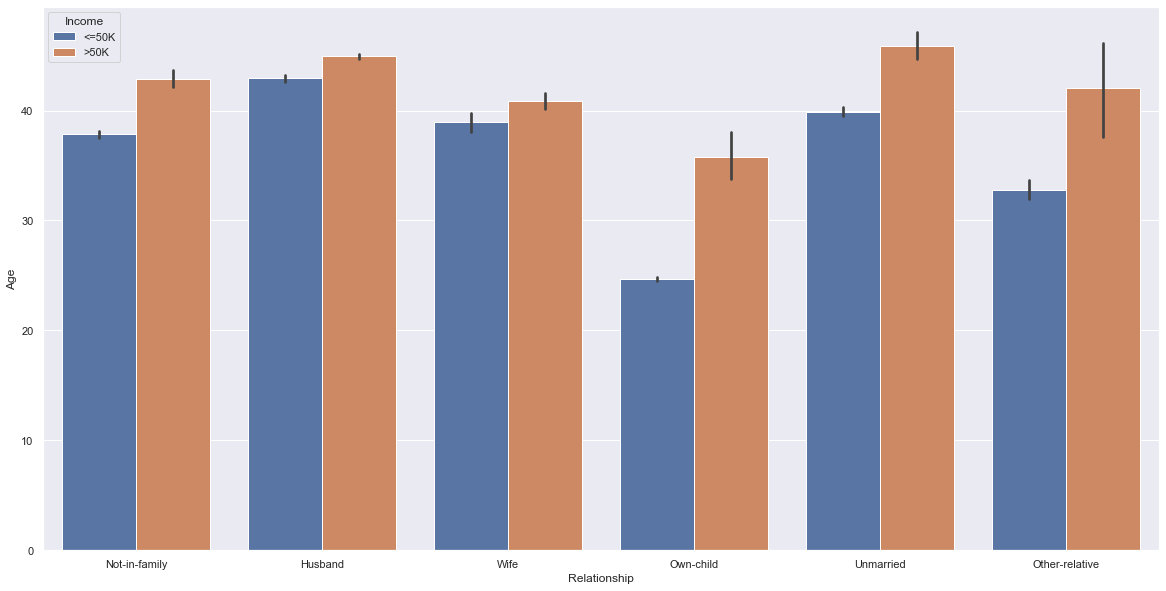

In [142]:
plt.figure(figsize=(20,10))
ax = sns.barplot(data=df_eda,x='Relationship',y='Age',hue='Income')


In [ ]:
#From the before insights, the people who are in  income >50K class has average age above 40

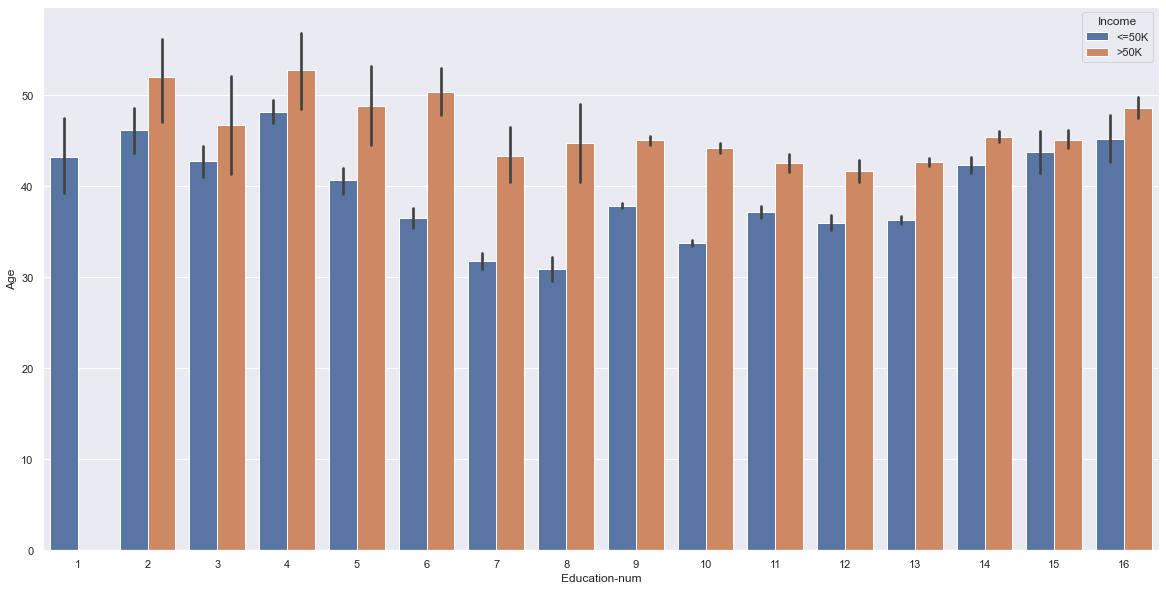

In [147]:
plt.figure(figsize=(20,10))
ax = sns.barplot(data=df_eda,x='Education-num',y='Age',hue='Income')


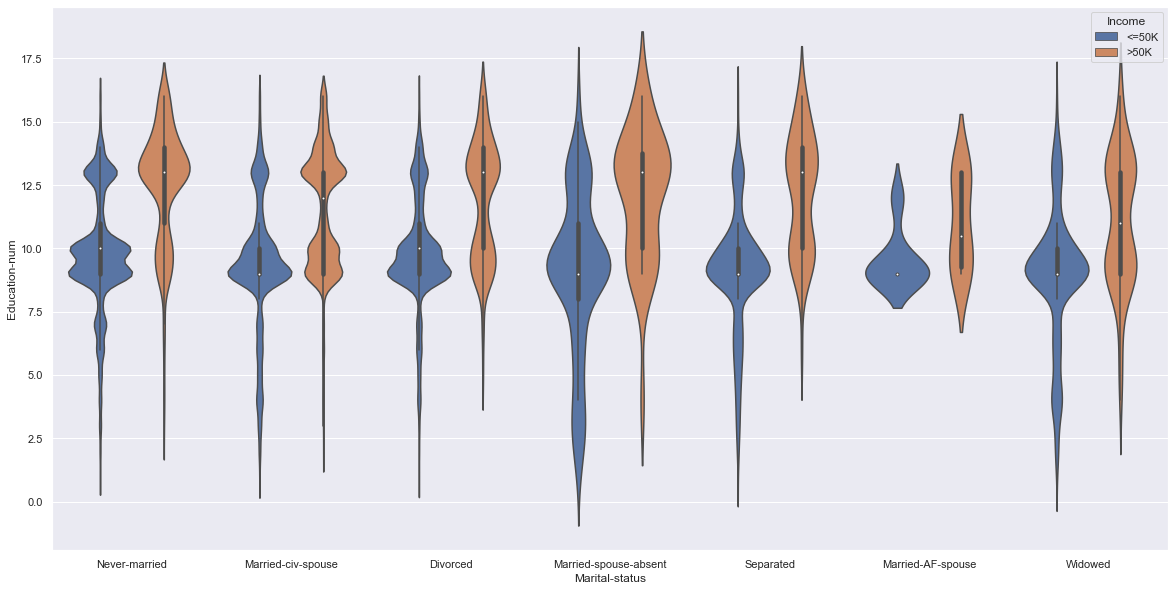

In [8]:
plt.figure(figsize=(20,10))
ax = sns.violinplot(data=df_eda,x='Marital-status',y='Education-num',hue='Income')


# Insights

- 66% Male and 40% them are husbands and some 18% of them belong to >50K class. Out of hose 18%, 13% have education-num    greater than 12 and majority of this 13% belongs to >50K class. Therefore, Education num is an important feature.



- 66% Male and 20% of them belong to >50K class and 18% of them are husbands and remaining must be not-in-family male



- 3% of female has income >50K and 2% of them are wives.


- Also from the above points, peope in the age of 40-55 tends to be in class >50K



- Major contributors to the >50K class are Not-in-family, husbands, wives with more than 12.5 years of educationand with average age around 40



- Similarly, Exec-manager, Prof-specialty, Tech support occupation have people with average 12 years of education.



- Husband's second highest common job 'Exec-manager'.
  Prof-speciality is one of the top most common job for wives and Not in family category.
  Note: Husband,wives and not in family are the major contributors for the class >50K


# People with age in 40-55 who are husbands or not-in-family male or wives with more than 12 years of education whose occupation are Exec-Manager or Prof-specialty or Tech Support or Protective-serv and  they work around 45-65 hours per week have a higer chance to be in >50K class

In [51]:
corr_mat = df_org.corr(method="spearman").abs()
corr_mat

,Age,Final_census,Education-num,Capital-gain,Capital-loss,Hours-per-week
Age,1.000000,0.077917,0.066199,0.116630,0.058433,0.142763
Final_census,0.077917,1.000000,0.035828,0.006738,0.006910,0.021882
Education-num,0.066199,0.035828,1.000000,0.103393,0.074730,0.167465
Capital-gain,0.116630,0.006738,0.103393,1.000000,0.064450,0.081939
Capital-loss,0.058433,0.006910,0.074730,0.064450,1.000000,0.059842
Hours-per-week,0.142763,0.021882,0.167465,0.081939,0.059842,1.000000


In [52]:
corr_mat[corr_mat>0.75]

,Age,Final_census,Education-num,Capital-gain,Capital-loss,Hours-per-week
Age,1.0,NaN,NaN,NaN,NaN,NaN
Final_census,NaN,1.0,NaN,NaN,NaN,NaN
Education-num,NaN,NaN,1.0,NaN,NaN,NaN
Capital-gain,NaN,NaN,NaN,1.0,NaN,NaN
Capital-loss,NaN,NaN,NaN,NaN,1.0,NaN
Hours-per-week,NaN,NaN,NaN,NaN,NaN,1.0


In [53]:
#There are no correlated numeric variables

In [54]:
df_org['Income'].value_counts(normalize=True)
#Slightly Imbalanced dataset

<=50K    0.759074
>50K     0.240926
Name: Income, dtype: float64

In [3]:
#We can drop the Education column since it is completely dependent and correlated to education-num.

In [3]:
x = df_org.drop(['Income','Education'],axis=1)
y = df_org['Income']

In [4]:
df_model_x = pd.get_dummies(x,drop_first=True)

In [5]:
y=np.where(y=='<=50K',0,1)

In [59]:
#Saved our dataframe
#df_model_x.to_feather('DataFrame/df_model_income_eval')

In [9]:
#df_model_x = pd.read_feather(f'DataFrame/df_model_income_eval')

In [6]:
def split_vals(X,Y):
    global X_train,X_test,Y_train,Y_test 
    X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=42)
    return None

In [7]:
split_vals(df_model_x,y)

In [8]:
def print_score(m):
    l=['Training Score','Testing Score','Training Classification Report','Test Classification Report','OOB_Score']
    res = [m.score(X_train, Y_train), m.score(X_test, Y_test),classification_report(Y_train,m.predict(X_train)),
           classification_report(Y_test,m.predict(X_test))]
    if hasattr(m, 'oob_score_'): res.append(m.oob_score_)
    
    for i,j in dict(zip(l,res)).items():
        print(f'\n{i}: ')
        print(j)

In [10]:
rf_base_model= RandomForestClassifier(min_samples_leaf=3,n_jobs=-1,random_state=42)
rf_base_model.fit(X_train,Y_train)

RandomForestClassifier(min_samples_leaf=3, n_jobs=-1, random_state=42)

In [11]:
print_score(rf_base_model)


Training Score: 
0.884398171270506

Testing Score: 
0.8678549477566072

Training Classification Report: 
              precision    recall  f1-score   support

           0       0.90      0.96      0.93     19758
           1       0.83      0.65      0.73      6271

    accuracy                           0.88     26029
   macro avg       0.87      0.80      0.83     26029
weighted avg       0.88      0.88      0.88     26029


Test Classification Report: 
              precision    recall  f1-score   support

           0       0.89      0.95      0.92      4940
           1       0.79      0.61      0.69      1568

    accuracy                           0.87      6508
   macro avg       0.84      0.78      0.80      6508
weighted avg       0.86      0.87      0.86      6508



In [572]:
parameters_to_tune = {'min_samples_leaf':[1,3,5],
                      'max_features':[0.3,0.5,'auto',0.2,0.1],
                      'n_estimators': [100,250,500,1000]
                     }

In [578]:
gsc_rf = GridSearchCV(estimator= rf_base_model, param_grid= parameters_to_tune, cv = 3, n_jobs= -1, scoring= 'balanced_accuracy')

gsc_rf_res = gsc_rf.fit(X_train,Y_train)

print(f'Best Parameters using Grid Search: {gsc_rf_res.best_params_}')
print(f'Best Score: {gsc_rf_res.best_score_}')

Best Parameters using Grid Search: {'max_features': 0.3, 'min_samples_leaf': 3, 'n_estimators': 250}
Best Score: 0.783259873957355


In [12]:
rf_model_1= RandomForestClassifier(n_estimators=250,min_samples_leaf=3,max_features=0.3,n_jobs=-1,random_state=42)
rf_model_1.fit(X_train,Y_train)

RandomForestClassifier(max_features=0.3, min_samples_leaf=3, n_estimators=250,
                       n_jobs=-1, random_state=42)

In [13]:
print_score(rf_model_1)


Training Score: 
0.9234699757962272

Testing Score: 
0.8689305470190535

Training Classification Report: 
              precision    recall  f1-score   support

           0       0.93      0.97      0.95     19758
           1       0.90      0.77      0.83      6271

    accuracy                           0.92     26029
   macro avg       0.92      0.87      0.89     26029
weighted avg       0.92      0.92      0.92     26029


Test Classification Report: 
              precision    recall  f1-score   support

           0       0.89      0.94      0.92      4940
           1       0.78      0.64      0.70      1568

    accuracy                           0.87      6508
   macro avg       0.83      0.79      0.81      6508
weighted avg       0.86      0.87      0.86      6508



In [11]:
#Slightly changing the parameters
rf_model_2= RandomForestClassifier(n_estimators=150,min_samples_leaf=3,max_features=0.2,n_jobs=-1,random_state=42)
rf_model_2.fit(X_train,Y_train)

RandomForestClassifier(max_features=0.2, min_samples_leaf=3, n_estimators=150,
                       n_jobs=-1, random_state=42)

In [12]:
print_score(rf_model_2)


Training Score: 
0.9078719889354182

Testing Score: 
0.8707744314689613

Training Classification Report: 
              precision    recall  f1-score   support

           0       0.92      0.97      0.94     19758
           1       0.87      0.72      0.79      6271

    accuracy                           0.91     26029
   macro avg       0.89      0.84      0.87     26029
weighted avg       0.91      0.91      0.90     26029


Test Classification Report: 
              precision    recall  f1-score   support

           0       0.89      0.94      0.92      4940
           1       0.78      0.64      0.71      1568

    accuracy                           0.87      6508
   macro avg       0.84      0.79      0.81      6508
weighted avg       0.87      0.87      0.87      6508



In [9]:
def plot_fi(m,X):
    feature_rank = pd.DataFrame({'feature': X.columns, 'importance':m.feature_importances_}).sort_values('importance',ascending=False)
    plt.figure(figsize=(17,20))
    plt.grid(False)
    ax = sns.barplot(data=feature_rank,x='importance',y='feature')
    return ax,feature_rank

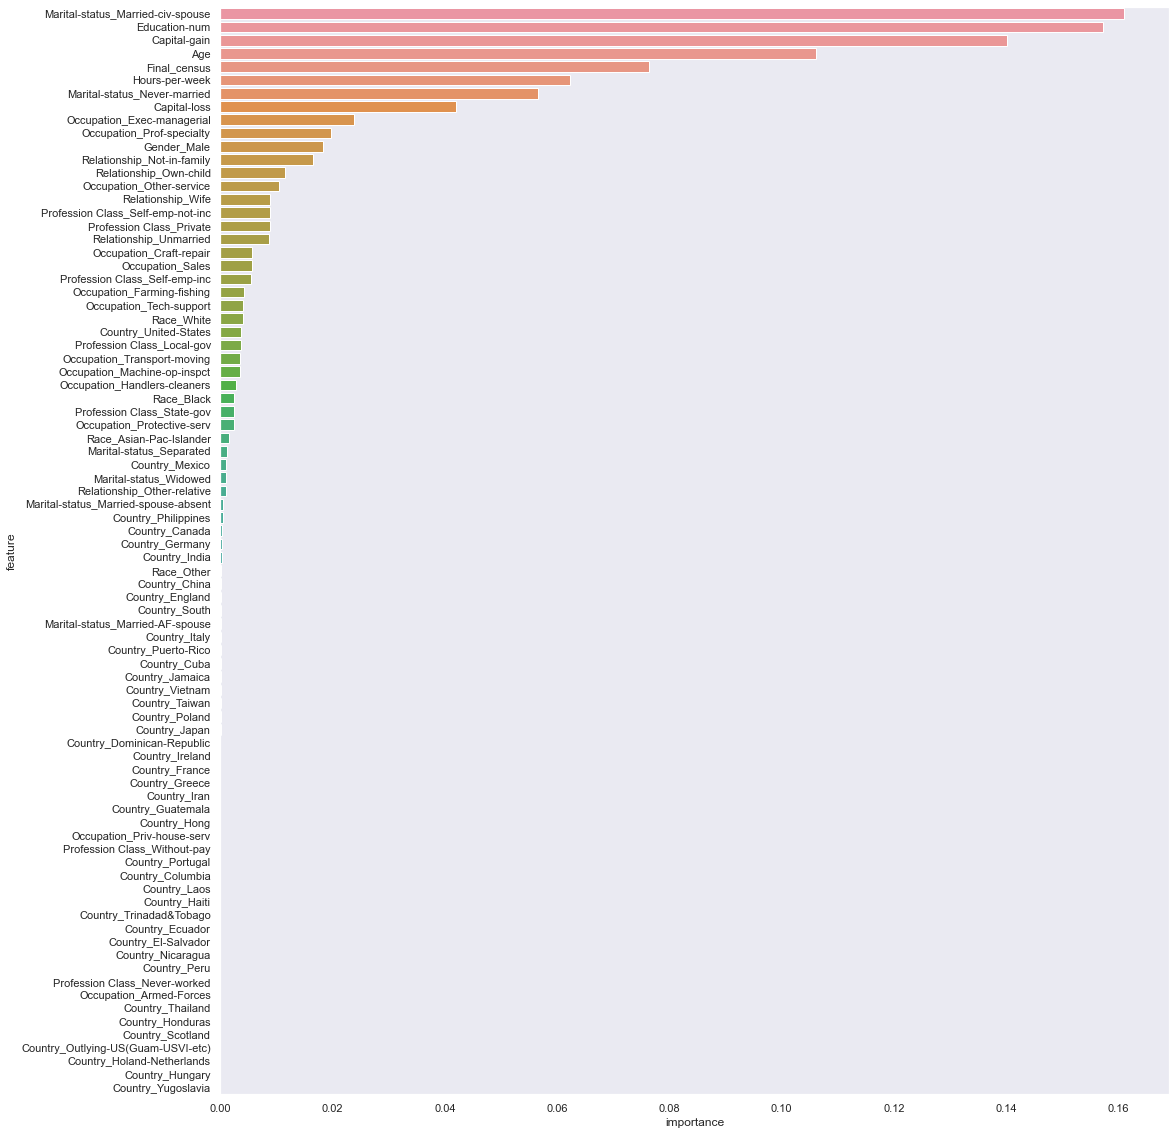

In [13]:
ax,feature_rank_rf = plot_fi(rf_model_2,X_train)

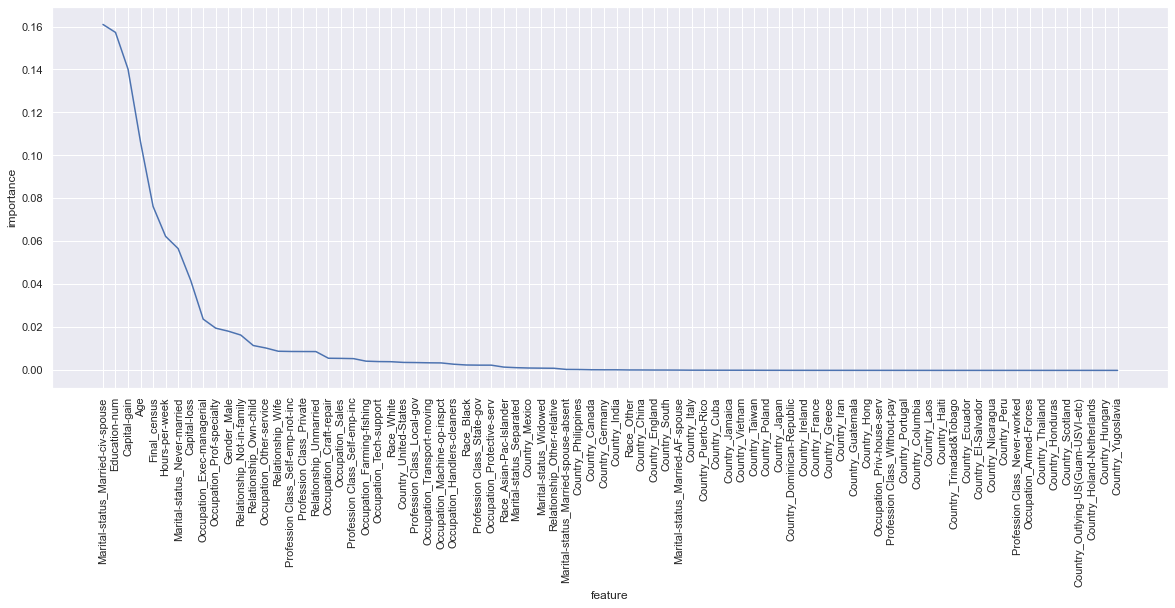

In [18]:
plt.figure(figsize=(20,7))
sns.lineplot(x='feature',y='importance',data=feature_rank_rf)
plt.xticks(rotation=90)
plt.show()


In [14]:
#Lets try to remove least important features and try to simplify our model without affecting our accuracy much
to_keep = feature_rank_rf[feature_rank_rf['importance']>0.002]

In [15]:
len(to_keep)

32

In [47]:

df_keep = df_model_x[to_keep['feature']]

In [50]:
split_vals(df_keep,y)

In [18]:
#Slightly changing the parameters
rf_model_2_keep= RandomForestClassifier(n_estimators=150,min_samples_leaf=3,max_features=0.2,n_jobs=-1,random_state=42)
rf_model_2_keep.fit(X_train,Y_train)

RandomForestClassifier(max_features=0.2, min_samples_leaf=3, n_estimators=150,
                       n_jobs=-1, random_state=42)

In [19]:
print_score(rf_model_2_keep)


Training Score: 
0.9101002727726766

Testing Score: 
0.8716963736939152

Training Classification Report: 
              precision    recall  f1-score   support

           0       0.92      0.97      0.94     19758
           1       0.88      0.73      0.80      6271

    accuracy                           0.91     26029
   macro avg       0.90      0.85      0.87     26029
weighted avg       0.91      0.91      0.91     26029


Test Classification Report: 
              precision    recall  f1-score   support

           0       0.89      0.94      0.92      4940
           1       0.78      0.64      0.71      1568

    accuracy                           0.87      6508
   macro avg       0.84      0.79      0.81      6508
weighted avg       0.87      0.87      0.87      6508



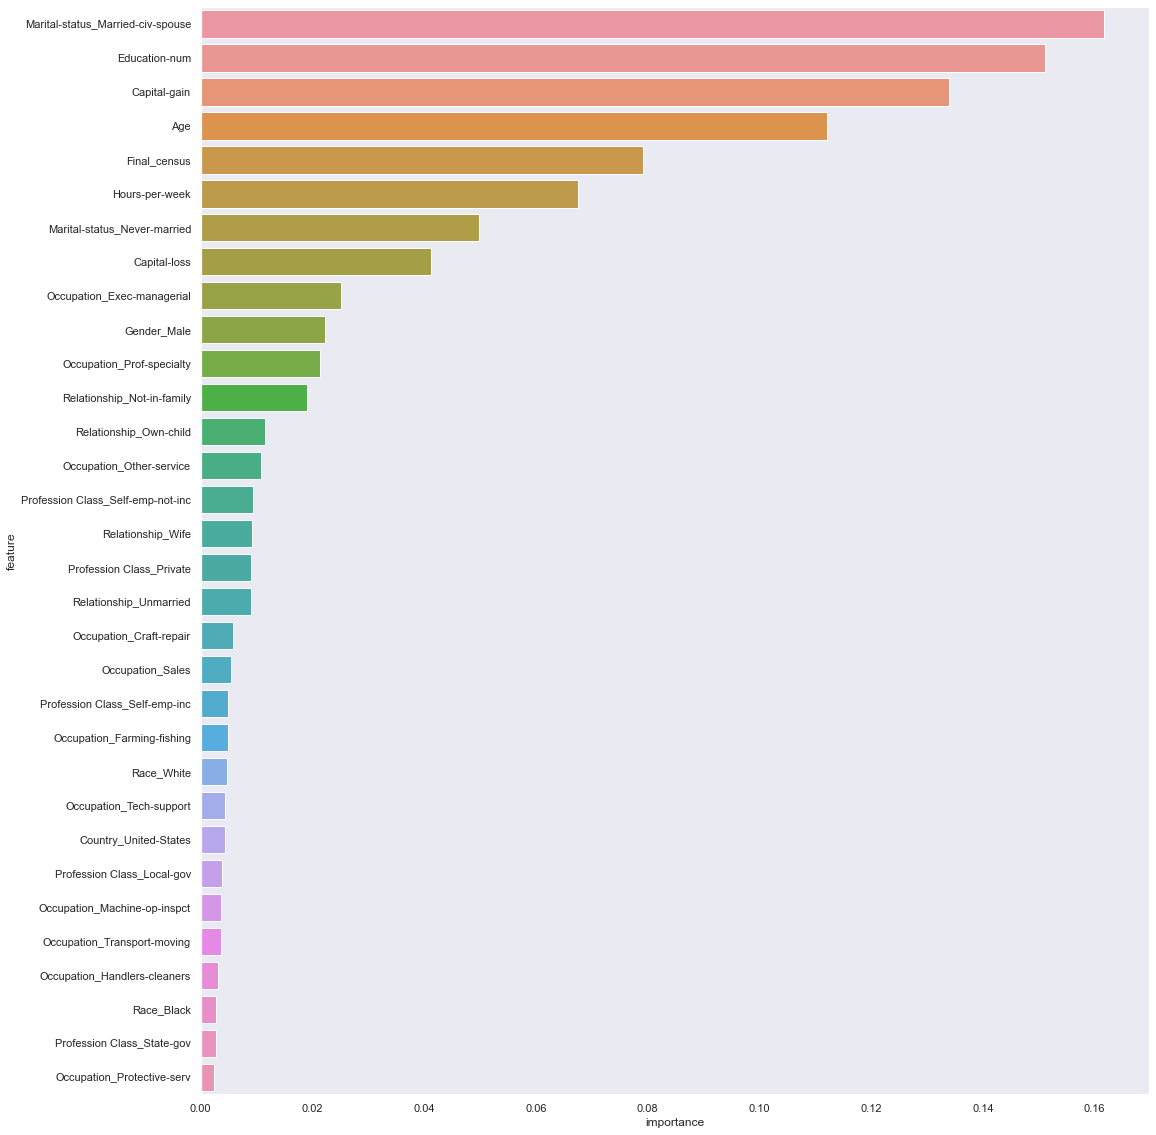

In [19]:
ax,feature_rank_rf_1 = plot_fi(rf_model_2_keep,X_train)

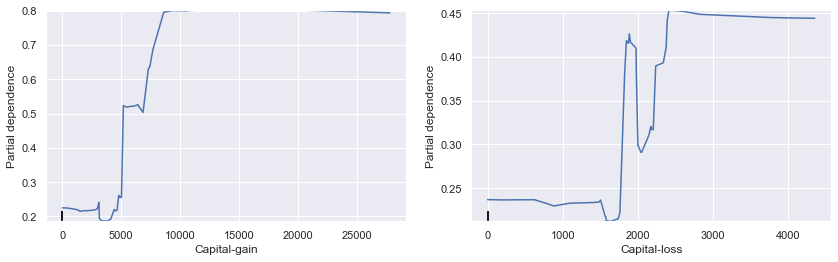

In [57]:
fig,ax = plt.subplots(1,2,figsize=(12, 4))
for i,j in enumerate(['Capital-gain','Capital-loss']):
    PartialDependenceDisplay.from_estimator(rf_model_2_keep, X_test,[j], ax=ax[i],percentiles=(0,1))
plt.tight_layout(pad =2)

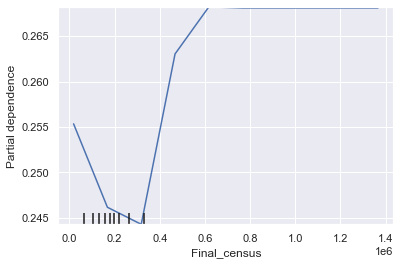

In [56]:
PartialDependenceDisplay.from_estimator(rf_model_2_keep,X_test,['Final_census'],percentiles=(0,1),grid_resolution=10)

In [36]:
#Final_census seems not to have that much of an impact in our dependent variable. Lets just cross check it.

In [37]:
def get_score(df):
    split_vals(df,y)
    rf_model_2_trial= RandomForestClassifier(n_estimators=150,min_samples_leaf=3,max_features=0.2,n_jobs=-1,random_state=42)
    rf_model_2_trial.fit(X_train,Y_train)
    return print_score(rf_model_2_trial)

In [38]:
for i in ['Final_census','Capital-loss','Capital-gain']:
    print(i)
    get_score(df_keep.drop(i,axis=1))

Final_census

Training Score: 
0.895923777325291

Testing Score: 
0.8727719729563614

Training Classification Report: 
              precision    recall  f1-score   support

           0       0.91      0.96      0.93     19758
           1       0.84      0.70      0.76      6271

    accuracy                           0.90     26029
   macro avg       0.88      0.83      0.85     26029
weighted avg       0.89      0.90      0.89     26029


Test Classification Report: 
              precision    recall  f1-score   support

           0       0.89      0.94      0.92      4940
           1       0.79      0.65      0.71      1568

    accuracy                           0.87      6508
   macro avg       0.84      0.80      0.81      6508
weighted avg       0.87      0.87      0.87      6508

Capital-loss

Training Score: 
0.9059126359061047

Testing Score: 
0.8630915795943455

Training Classification Report: 
              precision    recall  f1-score   support

           0       0.9

In [39]:
#As we can see evan without final census, it generalises well enough when compared to models that we have seen so far.

In [58]:
#Dropping the Final_census
df_keep.drop('Final_census',axis=1,inplace=True)

In [59]:
split_vals(df_keep,y)

In [22]:
rf_model_2_final= RandomForestClassifier(n_estimators=150,min_samples_leaf=3,max_features=0.2,n_jobs=-1,random_state=42)
rf_model_2_final.fit(X_train,Y_train)


RandomForestClassifier(max_features=0.2, min_samples_leaf=3, n_estimators=150,
                       n_jobs=-1, random_state=42)

In [23]:
print_score(rf_model_2_final)


Training Score: 
0.895923777325291

Testing Score: 
0.8727719729563614

Training Classification Report: 
              precision    recall  f1-score   support

           0       0.91      0.96      0.93     19758
           1       0.84      0.70      0.76      6271

    accuracy                           0.90     26029
   macro avg       0.88      0.83      0.85     26029
weighted avg       0.89      0.90      0.89     26029


Test Classification Report: 
              precision    recall  f1-score   support

           0       0.89      0.94      0.92      4940
           1       0.79      0.65      0.71      1568

    accuracy                           0.87      6508
   macro avg       0.84      0.80      0.81      6508
weighted avg       0.87      0.87      0.87      6508



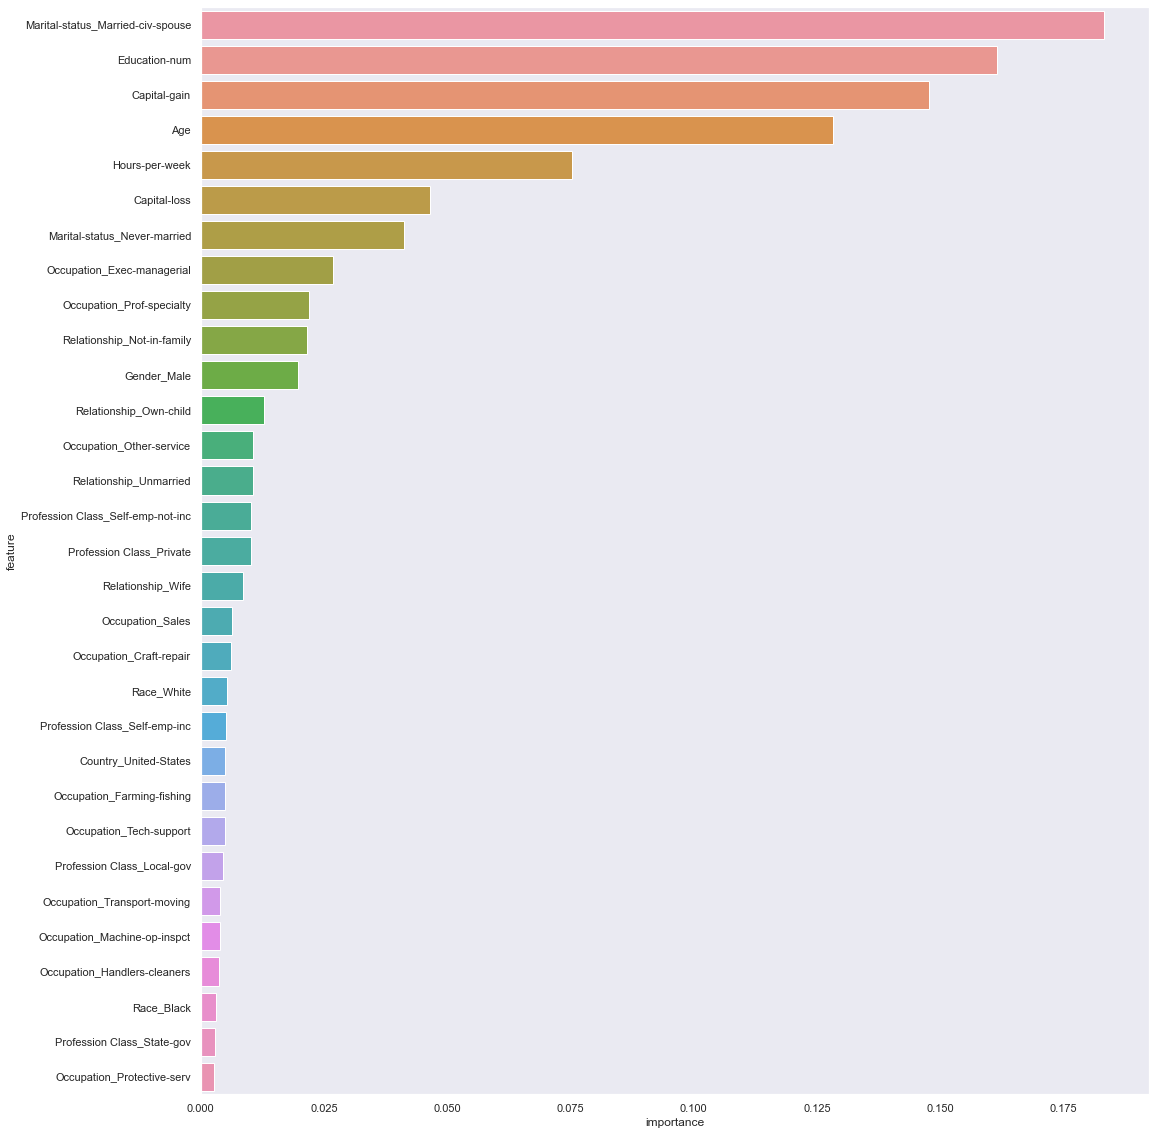

In [24]:
ax,feature_rank_rf_final = plot_fi(rf_model_2_final,X_train)

In [45]:
#Above are the main features that our model relied heavily on. Note that, Married civ spouse importance has been increased
#after removing the Final_census

In [46]:
#rf_model_2_final is the best we could get in Random Forest without scaling. Lets try XGBoost

In [31]:
#We are splitting the training data itself into 80-20% to pass a set of training data to the XGBoost.
#It can take a validation dataset and at each iteration, it checks the loss for the validation data 
#and will stop the iteration once there is no longer improvement in the validation metric
X_train_xg_fit,X_train_xg_val,Y_train_xg_fit,Y_train_xg_val=train_test_split(X_train,Y_train,test_size=0.2,random_state=42,stratify=Y_train)

In [36]:
xg_base_model = XGBClassifier(random_state = 42)
xg_base_model.fit(X_train_xg_fit,Y_train_xg_fit)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [37]:
print(xg_base_model.score(X_test,Y_test))
print(xg_base_model.score(X_train_xg_val,Y_train_xg_val))
print(xg_base_model.score(X_train_xg_fit,Y_train_xg_fit))

0.8758451137062078
0.8689973107952362
0.8977092637948423


In [38]:
print(classification_report(Y_train_xg_fit,xg_base_model.predict(X_train_xg_fit)))
print(classification_report(Y_train_xg_val,xg_base_model.predict(X_train_xg_val)))
print(classification_report(Y_test,xg_base_model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.92      0.95      0.93     15806
           1       0.83      0.72      0.77      5017

    accuracy                           0.90     20823
   macro avg       0.87      0.84      0.85     20823
weighted avg       0.90      0.90      0.90     20823

              precision    recall  f1-score   support

           0       0.90      0.93      0.92      3952
           1       0.76      0.67      0.71      1254

    accuracy                           0.87      5206
   macro avg       0.83      0.80      0.81      5206
weighted avg       0.87      0.87      0.87      5206

              precision    recall  f1-score   support

           0       0.90      0.94      0.92      4940
           1       0.78      0.68      0.73      1568

    accuracy                           0.88      6508
   macro avg       0.84      0.81      0.82      6508
weighted avg       0.87      0.88      0.87      6508



In [32]:
#Early Stopping parameter helps us in preventing Overfitting
xg_model_1 = XGBClassifier(n_estimators = 500, learning_rate = 0.1, verbosity = 1, random_state = 42)
xg_model_1.fit(X_train_xg_fit,Y_train_xg_fit, eval_set=[(X_train_xg_val,Y_train_xg_val)],early_stopping_rounds=30)

[0]	validation_0-logloss:0.63788
[1]	validation_0-logloss:0.59239
[2]	validation_0-logloss:0.55461
[3]	validation_0-logloss:0.52303
[4]	validation_0-logloss:0.49585
[5]	validation_0-logloss:0.47274
[6]	validation_0-logloss:0.45232
[7]	validation_0-logloss:0.43461
[8]	validation_0-logloss:0.41923
[9]	validation_0-logloss:0.40565
[10]	validation_0-logloss:0.39403
[11]	validation_0-logloss:0.38345
[12]	validation_0-logloss:0.37420
[13]	validation_0-logloss:0.36628
[14]	validation_0-logloss:0.35928
[15]	validation_0-logloss:0.35276
[16]	validation_0-logloss:0.34707
[17]	validation_0-logloss:0.34218
[18]	validation_0-logloss:0.33777
[19]	validation_0-logloss:0.33373
[20]	validation_0-logloss:0.33015
[21]	validation_0-logloss:0.32685
[22]	validation_0-logloss:0.32380
[23]	validation_0-logloss:0.32096
[24]	validation_0-logloss:0.31866
[25]	validation_0-logloss:0.31675
[26]	validation_0-logloss:0.31515
[27]	validation_0-logloss:0.31359
[28]	validation_0-logloss:0.31180
[29]	validation_0-loglos

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=500, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [33]:
print(xg_model_1.score(X_test,Y_test))
print(xg_model_1.score(X_train_xg_val,Y_train_xg_val))
print(xg_model_1.score(X_train_xg_fit,Y_train_xg_fit))

0.8761524277811924
0.869765655013446
0.887288094895068


In [34]:
print(classification_report(Y_train_xg_fit,xg_model_1.predict(X_train_xg_fit)))
print(classification_report(Y_train_xg_val,xg_model_1.predict(X_train_xg_val)))
print(classification_report(Y_test,xg_model_1.predict(X_test)))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93     15806
           1       0.81      0.69      0.75      5017

    accuracy                           0.89     20823
   macro avg       0.86      0.82      0.84     20823
weighted avg       0.88      0.89      0.88     20823

              precision    recall  f1-score   support

           0       0.90      0.93      0.92      3952
           1       0.76      0.67      0.71      1254

    accuracy                           0.87      5206
   macro avg       0.83      0.80      0.81      5206
weighted avg       0.87      0.87      0.87      5206

              precision    recall  f1-score   support

           0       0.90      0.94      0.92      4940
           1       0.78      0.68      0.73      1568

    accuracy                           0.88      6508
   macro avg       0.84      0.81      0.82      6508
weighted avg       0.87      0.88      0.87      6508



In [25]:
#Saving this dataframe
#df_keep.to_feather('DataFrame/df_keep')

In [28]:
bgc_base = BaggingClassifier(base_estimator=DecisionTreeClassifier(min_samples_leaf=3,random_state=42)
                             ,n_estimators=100,max_samples=0.2,random_state=42,n_jobs=-1)
bgc_base.fit(X_train,Y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(min_samples_leaf=3,
                                                        random_state=42),
                  max_samples=0.2, n_estimators=100, n_jobs=-1,
                  random_state=42)

In [29]:
print_score(bgc_base)


Training Score: 
0.8838987283414653

Testing Score: 
0.870159803318992

Training Classification Report: 
              precision    recall  f1-score   support

           0       0.90      0.95      0.93     19758
           1       0.82      0.67      0.74      6271

    accuracy                           0.88     26029
   macro avg       0.86      0.81      0.83     26029
weighted avg       0.88      0.88      0.88     26029


Test Classification Report: 
              precision    recall  f1-score   support

           0       0.89      0.94      0.92      4940
           1       0.78      0.64      0.70      1568

    accuracy                           0.87      6508
   macro avg       0.84      0.79      0.81      6508
weighted avg       0.87      0.87      0.87      6508



In [56]:
#We got good accracy metrics from our bagging and boosting method algorithms. Lets standardize the data and trysome algoithm

In [24]:
#Standardising the data to try Logistic and other classification Algorithms
X_train_stand = X_train.copy()
X_test_stand = X_test.copy()
num_cols = ['Age','Education-num','Capital-gain','Capital-loss','Hours-per-week']

for i in num_cols:
    scale = StandardScaler().fit(X_train_stand[[i]])
    X_train_stand[i] = scale.transform(X_train_stand[[i]])
    X_test_stand[i] = scale.transform(X_test_stand[[i]])

In [25]:
def print_score_stand(m):
    l=['Training Score','Testing Score','Training Classification Report','Test Classification Report','OOB_Score']
    res = [m.score(X_train_stand, Y_train), m.score(X_test_stand, Y_test),classification_report(Y_train,m.predict(X_train_stand)),
           classification_report(Y_test,m.predict(X_test_stand))]
    if hasattr(m, 'oob_score_'): res.append(m.oob_score_)
    
    for i,j in dict(zip(l,res)).items():
        print(f'\n{i}: ')
        print(j)


In [34]:
bgc_knn = BaggingClassifier(base_estimator=KNeighborsClassifier()
                             ,n_estimators=2,
                            random_state=42,n_jobs=-1)
bgc_knn.fit(X_train_stand,Y_train)

BaggingClassifier(base_estimator=KNeighborsClassifier(), n_estimators=5,
                  n_jobs=-1, random_state=42)

In [ ]:
print_score_stand(bgc_knn)

In [26]:
bgc_lr = BaggingClassifier(base_estimator=LogisticRegression(random_state=42)
                             ,n_estimators=30,max_samples=0.5,random_state=42,n_jobs=-1)
bgc_lr.fit(X_train_stand,Y_train)

BaggingClassifier(base_estimator=LogisticRegression(random_state=42),
                  max_samples=0.5, n_estimators=30, n_jobs=-1, random_state=42)

In [27]:
print_score_stand(bgc_lr)


Training Score: 
0.8472473010872489

Testing Score: 
0.8537185003073141

Training Classification Report: 
              precision    recall  f1-score   support

           0       0.88      0.93      0.90     19758
           1       0.72      0.59      0.65      6271

    accuracy                           0.85     26029
   macro avg       0.80      0.76      0.78     26029
weighted avg       0.84      0.85      0.84     26029


Test Classification Report: 
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      4940
           1       0.73      0.62      0.67      1568

    accuracy                           0.85      6508
   macro avg       0.81      0.77      0.79      6508
weighted avg       0.85      0.85      0.85      6508



In [580]:
knn_base = KNeighborsClassifier(n_neighbors=10)
knn_base.fit(X_train_stand,Y_train)

KNeighborsClassifier(n_neighbors=10)

In [581]:
print_score_stand(knn_base)


Training Score: 
0.8724499596603789

Testing Score: 
0.8566379840196681

Training Classification Report: 
              precision    recall  f1-score   support

           0       0.89      0.95      0.92     19758
           1       0.80      0.63      0.70      6271

    accuracy                           0.87     26029
   macro avg       0.84      0.79      0.81     26029
weighted avg       0.87      0.87      0.87     26029


Test Classification Report: 
              precision    recall  f1-score   support

           0       0.88      0.94      0.91      4940
           1       0.75      0.61      0.67      1568

    accuracy                           0.86      6508
   macro avg       0.82      0.77      0.79      6508
weighted avg       0.85      0.86      0.85      6508



In [582]:
lr_base = LogisticRegression(random_state=42)
lr_base.fit(X_train_stand,Y_train)

LogisticRegression(random_state=42)

In [583]:
print_score_stand(lr_base)


Training Score: 
0.8478235813899881

Testing Score: 
0.8544867854947756

Training Classification Report: 
              precision    recall  f1-score   support

           0       0.88      0.93      0.90     19758
           1       0.73      0.59      0.65      6271

    accuracy                           0.85     26029
   macro avg       0.80      0.76      0.78     26029
weighted avg       0.84      0.85      0.84     26029


Test Classification Report: 
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      4940
           1       0.73      0.62      0.67      1568

    accuracy                           0.85      6508
   macro avg       0.81      0.78      0.79      6508
weighted avg       0.85      0.85      0.85      6508



In [41]:
print('BEFORE BALANCING THE DATSET:')
print(f'XG BOOST:')
print_score(xg_model_1)
print('-'*75)
print(f'BAGGING CLASSIFIER:')
print_score(bgc_base)
print('-'*75)
print(f'RANDOM FOREST:')
print_score(rf_model_2_final)

BEFORE BALANCING THE DATSET:
XG BOOST:

Training Score: 
0.8837834722809175

Testing Score: 
0.8761524277811924

Training Classification Report: 
              precision    recall  f1-score   support

           0       0.91      0.95      0.93     19758
           1       0.80      0.69      0.74      6271

    accuracy                           0.88     26029
   macro avg       0.85      0.82      0.83     26029
weighted avg       0.88      0.88      0.88     26029


Test Classification Report: 
              precision    recall  f1-score   support

           0       0.90      0.94      0.92      4940
           1       0.78      0.68      0.73      1568

    accuracy                           0.88      6508
   macro avg       0.84      0.81      0.82      6508
weighted avg       0.87      0.88      0.87      6508

---------------------------------------------------------------------------
BAGGING CLASSIFIER:

Training Score: 
0.8838987283414653

Testing Score: 
0.870159803318992

T

In [42]:
for model in[rf_model_2_final,xg_model_1,bgc_base]:
    print("======="*5)
    print("Performance of",model)
    print("======="*5)
    cv=StratifiedShuffleSplit(n_splits=10,test_size=0.25,random_state=50)
    scoring=["f1_macro","precision_macro","recall_macro",'accuracy']
    cross_val_scores=cross_validate(model,df_keep,y,scoring=scoring,cv=cv)
    f1_test_cv=round(cross_val_scores["test_f1_macro"].mean(),4)
    precisio_test_cv=round(cross_val_scores["test_precision_macro"].mean(),4)
    Recall_test_cv=round(cross_val_scores["test_recall_macro"].mean(),4)
    accuracy_test = round(cross_val_scores["test_accuracy"].mean(),4)
    # print of metrics
    print("F1 MACRO",f1_test_cv) 
    print("PRECISION MACRO",precisio_test_cv) 
    print("RECALL MACRO",Recall_test_cv) 
    print("ACCURACY",accuracy_test)

Performance of RandomForestClassifier(max_features=0.2, min_samples_leaf=3, n_estimators=150,
                       n_jobs=-1, random_state=42)
F1 MACRO 0.8005
PRECISION MACRO 0.8258
RECALL MACRO 0.7826
ACCURACY 0.8634
Performance of XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=500, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)
F1 MACRO 0.8122


In [229]:
#The above ouput gives us an indication of performance of models on a whole

In [43]:
y_proba_xg = xg_model_1.predict_proba(X_test)
y_proba_list_thres = list(zip(Y_test[:20], y_proba_xg[0:20,1]))

# show the probability of positive class for first 20 instances
y_proba_list_thres

[(0, 0.00814967),
 (1, 0.60083956),
 (0, 0.04254331),
 (0, 0.07210397),
 (0, 0.07778005),
 (0, 0.03296381),
 (0, 0.3730778),
 (0, 0.016430598),
 (0, 0.00093769113),
 (1, 0.07742228),
 (0, 0.0011584443),
 (0, 0.0615488),
 (0, 0.01705832),
 (1, 0.46479344),
 (0, 0.2652298),
 (0, 0.006911407),
 (0, 0.009826204),
 (0, 0.03474697),
 (1, 0.9990471),
 (0, 0.002157071)]

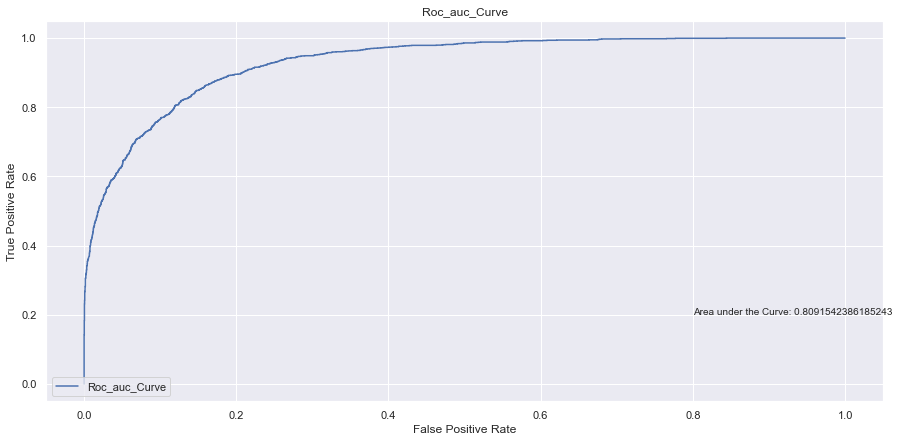

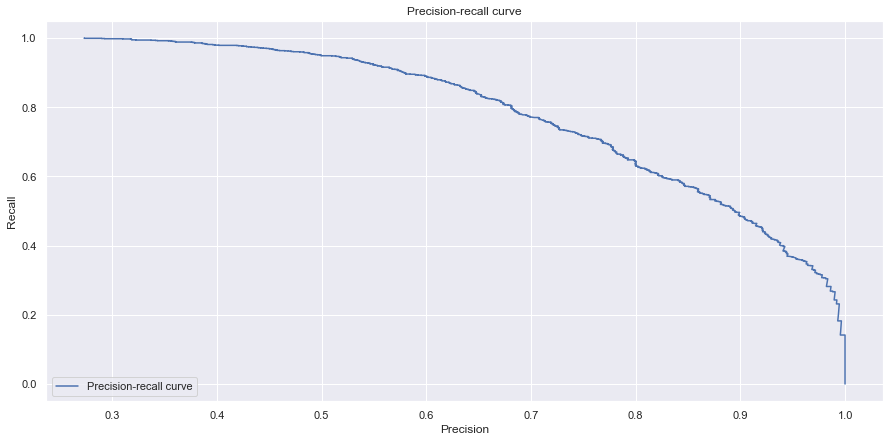

In [44]:
fpr,tpr, thresholds_roc = roc_curve( Y_test,y_proba_xg[:,1])

precision,recall, thresholds_pr = precision_recall_curve( Y_test,y_proba_xg[:,1])


# plot precision-recall curve
plt.figure(figsize=(15,7))
plt.plot(fpr, tpr, label='Roc_auc_Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Roc_auc_Curve')
plt.legend(loc="lower left")
plt.text(0.8,0.2,f'Area under the Curve: {roc_auc_score(Y_test,xg_model_1.predict(X_test))}')
plt.show()

# plot precision-recall curve
plt.figure(figsize=(15,7))
plt.plot(precision, recall, label='Precision-recall curve')
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.title('Precision-recall curve')
plt.legend(loc="lower left")
plt.show()


# The best we could get is 88% accuracy with XG Boost

# Model Interpretation

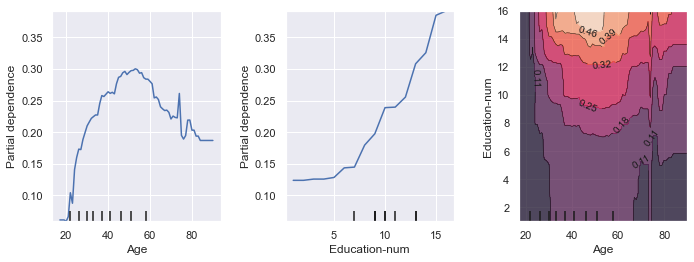

In [87]:
_, ax = plt.subplots(ncols=3, figsize=(10, 4), constrained_layout=True)
s = PartialDependenceDisplay.from_estimator(xg_model_1,X_test,
                                        ['Age','Education-num',
                                         ('Age','Education-num')]
                                        ,percentiles=(0,1),ax=ax,kind='average')
plt.tight_layout(pad=2)

In [88]:
#With these Partial Dependent Plots, we can interpret useful information/ insights about our model and its predictions

In [107]:
row = X_test.iloc[:5]

In [139]:
row.values[0]

array([ 0., 14.,  0., 27., 40.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,
        0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,
        1.,  0.,  0.,  0.,  0.])

In [172]:
prediction,bias,contributions = treeinterpreter.predict(rf_model_2_final, row.values)

In [208]:
idxs = np.argsort(contributions[0][:,1])
[i for i in zip(df_keep.columns[idxs], X_test.iloc[0][idxs], contributions[0][:,1][idxs])]

[('Age', 27.0, -0.09836818237371284),
 ('Marital-status_Married-civ-spouse', 0.0, -0.0771129226744897),
 ('Marital-status_Never-married', 1.0, -0.05562580781438832),
 ('Hours-per-week', 40.0, -0.02221174885136795),
 ('Gender_Male', 0.0, -0.020189450686862443),
 ('Capital-gain', 0.0, -0.01958389130215814),
 ('Relationship_Not-in-family', 1.0, -0.01787507184735053),
 ('Occupation_Prof-specialty', 0.0, -0.013838966405375535),
 ('Occupation_Exec-managerial', 0.0, -0.009041704973487186),
 ('Capital-loss', 0.0, -0.00390642595984214),
 ('Relationship_Wife', 0.0, -0.0019491733229697785),
 ('Profession Class_Self-emp-not-inc', 0.0, -0.0006700262135764585),
 ('Occupation_Craft-repair', 0.0, -0.0006612251375526927),
 ('Race_Black', 0.0, -0.0004639594931755659),
 ('Profession Class_Self-emp-inc', 0.0, -0.00046202141422334417),
 ('Occupation_Machine-op-inspct', 1.0, -0.00035315394691031094),
 ('Occupation_Protective-serv', 0.0, -0.00031548807411369516),
 ('Occupation_Transport-moving', 0.0, -3.6169

In [191]:
#Looking at just the First row
prediction[0][1], bias[0][1], contributions[0][:,1].sum()


(0.0340382631152253, 0.24090847388169606, -0.20687021076647072)

<module 'matplotlib.pyplot' from 'C:\\Users\\Dell\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

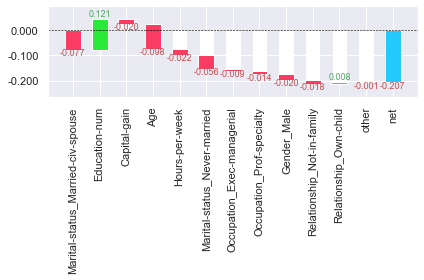

In [205]:
waterfall(X_test.columns, contributions[0][:,1], 
          rotation_value=90,formatting='{:,.3f}',threshold=0.05)


In [229]:
#Created just for explainability purpose
dt = DecisionTreeClassifier(max_depth=3,random_state=42)
dt.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

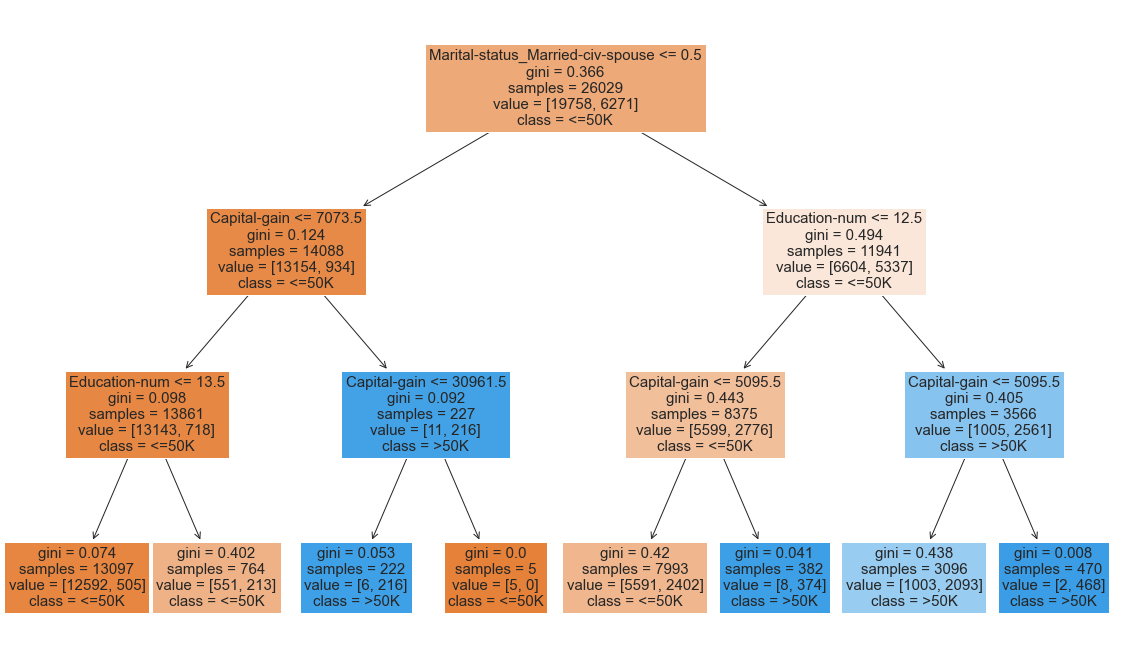

In [246]:
_,ax = plt.subplots(1,1,figsize=(20,12))
tree.plot_tree(dt,
               feature_names = X_train.columns, 
               class_names=['<=50K','>50K'],
               filled = True,ax=ax,fontsize=15)   
plt.show()

In [258]:
df_org['Income'].value_counts()

<=50K    24698
>50K      7839
Name: Income, dtype: int64

In [ ]:
#Lets just try balancing our dataset using smote and other techniques.

In [256]:
smote = SMOTE()
over=RandomOverSampler()
border=BorderlineSMOTE()
under=RandomUnderSampler()

In [257]:
for model in[RandomForestClassifier(min_samples_leaf=10,random_state=42,n_jobs=-1),
             BaggingClassifier(DecisionTreeClassifier(min_samples_leaf=5,random_state=42),random_state=42,n_jobs=-1),
             XGBClassifier(random_state=42,n_jobs=-1)]:
    print("======="*6)
    print("Performance of",model)
    print("======="*6)
    for balancer in[smote,over,border,under]:
        X_train_1,Y_train_1=balancer.fit_resample(X_train,Y_train)
        abc=model.fit(X_train_1,Y_train_1)
        y_pred=abc.predict(X_test)
        AS=accuracy_score(Y_test,y_pred)
        AS_train=accuracy_score(Y_train_1,abc.predict(X_train_1))
        CR=classification_report(Y_test,y_pred)
        CR_train=classification_report(Y_train_1,abc.predict(X_train_1))
        ROC=roc_auc_score(Y_test,y_pred)
        PRFS=precision_recall_fscore_support(Y_test,y_pred, average='macro')
        
        # print of metrics
        print(f'Balancing Technique:{balancer}')
        print("Accuracy Test \n",AS)
        print("Accuracy Train \n",AS_train)
        print("======="*3)
        print("Classification Report Test\n",CR)
        print("Classification Report Train\n",CR_train)
        print("======="*3)
        print("ROC_AUC \n",ROC) 
        print("======="*3)
        print("MACRO Precision_recall_F1 \n",PRFS) 
    

Performance of RandomForestClassifier(min_samples_leaf=10, n_jobs=-1, random_state=42)
Balancing Technique:SMOTE()
Accuracy Test 
 0.8411186232329441
Accuracy Train 
 0.8828575766778014
Classification Report Test
               precision    recall  f1-score   support

           0       0.93      0.85      0.89      4940
           1       0.63      0.80      0.71      1568

    accuracy                           0.84      6508
   macro avg       0.78      0.83      0.80      6508
weighted avg       0.86      0.84      0.85      6508

Classification Report Train
               precision    recall  f1-score   support

           0       0.90      0.86      0.88     19758
           1       0.87      0.90      0.89     19758

    accuracy                           0.88     39516
   macro avg       0.88      0.88      0.88     39516
weighted avg       0.88      0.88      0.88     39516

ROC_AUC 
 0.8274332810047095
MACRO Precision_recall_F1 
 (0.7830553304896912, 0.8274332810047096, 0.799

Balancing Technique:SMOTE()
Accuracy Test 
 0.8504917025199754
Accuracy Train 
 0.9086699058609171
Classification Report Test
               precision    recall  f1-score   support

           0       0.93      0.87      0.90      4940
           1       0.66      0.78      0.72      1568

    accuracy                           0.85      6508
   macro avg       0.79      0.83      0.81      6508
weighted avg       0.86      0.85      0.85      6508

Classification Report Train
               precision    recall  f1-score   support

           0       0.92      0.89      0.91     19758
           1       0.89      0.93      0.91     19758

    accuracy                           0.91     39516
   macro avg       0.91      0.91      0.91     39516
weighted avg       0.91      0.91      0.91     39516

ROC_AUC 
 0.8279481326943734
MACRO Precision_recall_F1 
 (0.7933598331022688, 0.8279481326943734, 0.8075202291512981, None)
Balancing Technique:RandomOverSampler()
Accuracy Test 
 0.83866011

In [259]:
#The above Balancing technique gives us the same result as we got before.

# Final Result

# We choose the XGB Classifier(xg_model_1)with without any Balancing technique as our best model

In [260]:
xg_model_1.get_xgb_params

<bound method XGBModel.get_xgb_params of XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=500, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)>